This Python notebook is focused on the usage of Neural Networks and Support Vector Regression for the task of WN the specific application, Comparative Analysis (as is described in the Thesis: "ML-ASSISTED DATA ANALYTICS AND WEATHER NORMALIZATION TO AID IN COMMERCIAL BUILDING ENERGY AUDITS").

# Libraries & Packages

In [ ]:
pip install tensorflow

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from scipy.interpolate import griddata
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import and organize data:

# Importing MONTHLY file from GitHub for Monthly Data
url_monthly = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B1_monthlyrawdata.csv'
df_monthly = pd.read_csv(url_monthly)

# Importing DAILY file from GitHub for Daily SVR attempt
url_daily = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B1_dailyrawdata.csv'
df_daily = pd.read_csv(url_daily)

# Importing HOURLY file from GitHub for Daily SVR attempt
url_hourly = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B1_hourlyrawdata.csv'
df_hourly = pd.read_csv(url_hourly)

# Light Data Re-arrangement
b1_daily_arr = np.array(df_daily)
b1_daily_raw = b1_daily_arr[0:1461,0:32]
# print(b1_daily_raw)

b1_hourly_arr = np.array(df_hourly)
b1_hourly_raw = b1_hourly_arr[0:36064,0:25]
# print(b1_hourly_raw)

b1_monthly_arr = np.array(df_monthly)
b1_monthly_raw = b1_monthly_arr[0:72,0:32]
# print(b1_monthly_raw)

b1_daily_df = pd.DataFrame({ 'Year': b1_daily_raw[:,1],
                            'Month': b1_daily_raw[:,2],
                                'EnergyUse': b1_daily_raw[:,6],
                                'Temp': b1_daily_raw[:,9],
                                'feelslike': b1_daily_raw[:,12],
                                'RelHum': b1_daily_raw[:,13],
                                'Humidity': b1_daily_raw[:,14],
                                'Precip': b1_daily_raw[:,15],
                                'Snow': b1_daily_raw[:,19],
                                'WindGust': b1_daily_raw[:,21],
                                'WindSpeed': b1_daily_raw[:,22],
                                'WindDir': b1_daily_raw[:,23],
                                'SeaLevelPressure': b1_daily_raw[:,24],
                                'CloudCover': b1_daily_raw[:,25],
                                'Visibility': b1_daily_raw[:,26],
                                'SolarRadiation': b1_daily_raw[:,27],
                                'SolarEnergy': b1_daily_raw[:,28],
                                'UVIndex': b1_daily_raw[:,29]})

b1_hourly_df = pd.DataFrame({ 'Year': b1_hourly_raw[:,0],
                                'Month': b1_hourly_raw[:,1],
                                'EnergyUse': b1_hourly_raw[:,6],
                                'Temp': b1_hourly_raw[:,7],
                                'feelslike': b1_hourly_raw[:,8],
                                'RelHum': b1_hourly_raw[:,9],
                                'Humidity': b1_hourly_raw[:,10],
                                'Precip': b1_hourly_raw[:,11],
                                'Snow': b1_hourly_raw[:,14],
                                'WindGust': b1_hourly_raw[:,16],
                                'WindSpeed': b1_hourly_raw[:,17],
                                'WindDir': b1_hourly_raw[:,18],
                                'SeaLevelPressure': b1_hourly_raw[:,19],
                                'CloudCover': b1_hourly_raw[:,20],
                                'Visibility': b1_hourly_raw[:,21],
                                'SolarRadiation': b1_hourly_raw[:,22],
                                'SolarEnergy': b1_hourly_raw[:,23],
                                'UVIndex': b1_hourly_raw[:,24]})

b1_monthly_df = pd.DataFrame({ 'Year': b1_monthly_raw[:,0],
                                'Month': b1_monthly_raw[:,1],
                                'EnergyUse': b1_monthly_raw[:,3],
                                'Temp': b1_monthly_raw[:,6],
                                'feelslike': b1_monthly_raw[:,9],
                                'RelHum': b1_monthly_raw[:,10],
                                'Humidity': b1_monthly_raw[:,11],
                                'Precip': b1_monthly_raw[:,12],
                                'Snow': b1_monthly_raw[:,16],
                                'WindGust': b1_monthly_raw[:,18],
                                'WindSpeed': b1_monthly_raw[:,19],
                                'WindDir': b1_monthly_raw[:,20],
                                'SeaLevelPressure': b1_monthly_raw[:,21],
                                'CloudCover': b1_monthly_raw[:,22],
                                'Visibility': b1_monthly_raw[:,23],
                                'SolarRadiation': b1_monthly_raw[:,24],
                                'SolarEnergy': b1_monthly_raw[:,25],
                                'UVIndex': b1_monthly_raw[:,26]})

# Feature Scaling (necessary for data to be scaled down ahead of NN processing)
sc_Xd = StandardScaler()
sc_yd = StandardScaler()

# Building 1, Neural Network (Comparative Analysis, Monthly)

In [ ]:
# Start with Monthly Data, Temperature & Energy Use
# Seperate Data by Year (MONTHLY)
b1_monthly_1923 = b1_monthly_df[(b1_monthly_df['Year'] == 2019) | (b1_monthly_df['Year'] == 2020) | (b1_monthly_df['Year'] == 2021) | (b1_monthly_df['Year'] == 2022) | (b1_monthly_df['Year'] == 2023)] # "Baseline" Years
b1_monthly_2024 = b1_monthly_df[(b1_monthly_df['Year'] == 2024)] # "Subject" Year

b1_monthly_2019 = b1_monthly_df[(b1_monthly_df['Year'] == 2019)]
b1_monthly_2020 = b1_monthly_df[(b1_monthly_df['Year'] == 2020)]
b1_monthly_2021 = b1_monthly_df[(b1_monthly_df['Year'] == 2021)]
b1_monthly_2022 = b1_monthly_df[(b1_monthly_df['Year'] == 2022)]
b1_monthly_2023 = b1_monthly_df[(b1_monthly_df['Year'] == 2023)]

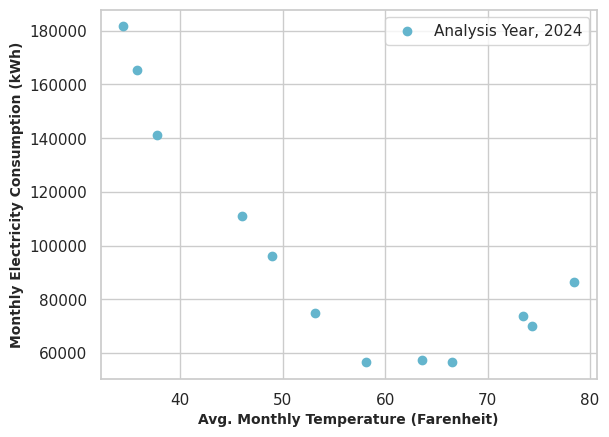

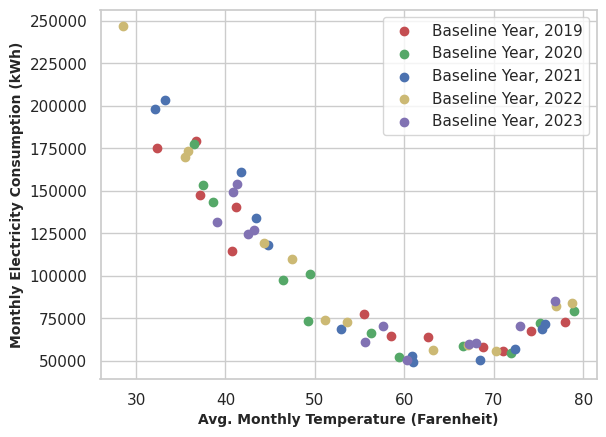

In [ ]:
# Seperately plot the baseline years and the "test" or "analysis" year
sns.set(style='whitegrid')
plt.scatter(b1_monthly_2024['Temp'], b1_monthly_2024['EnergyUse'], label='Analysis Year, 2024', color='c')
plt.xlabel('Avg. Monthly Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

sns.set(style='whitegrid')
plt.scatter(b1_monthly_2019['Temp'], b1_monthly_2019['EnergyUse'], label='Baseline Year, 2019', color='r')
plt.scatter(b1_monthly_2020['Temp'], b1_monthly_2020['EnergyUse'], label='Baseline Year, 2020', color='g')
plt.scatter(b1_monthly_2021['Temp'], b1_monthly_2021['EnergyUse'], label='Baseline Year, 2021', color='b')
plt.scatter(b1_monthly_2022['Temp'], b1_monthly_2022['EnergyUse'], label='Baseline Year, 2022', color='y')
plt.scatter(b1_monthly_2023['Temp'], b1_monthly_2023['EnergyUse'], label='Baseline Year, 2023', color='m')
plt.xlabel('Avg. Monthly Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
# START WITH BASELINE YEARS (2019-2023)
X_m_ca_temp = sc_Xd.fit_transform(b1_monthly_1923[['Temp']])
Y_m_ca_ener = sc_yd.fit_transform(b1_monthly_1923[['EnergyUse']])

In [ ]:
# Assign data (using just 2019-2023)
X_m_ca_bas_nn = X_m_ca_temp.astype(float)
y_m_ca_bas_nn = Y_m_ca_ener.astype(float)

# Split into training and testing for 2019-2023 (30% test, 70% train)
X_nn_m_ca_bas_train, X_nn_m_ca_bas_test, y_nn_m_ca_bas_train, y_nn_m_ca_bas_test = train_test_split(X_m_ca_bas_nn, y_m_ca_bas_nn, test_size=0.3, random_state=42)

In [ ]:
model_m_ca_bas = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_m_ca_bas.summary()

In [ ]:
# Compile the baseline model with loss function and optimizer
model_m_ca_bas.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

In [ ]:
# Train baseline model
# Adjust the number of epochs and batch size based on your data and resources.
model_m_ca_bas.fit(X_nn_m_ca_bas_train, y_nn_m_ca_bas_train, epochs=25, batch_size=32, validation_data=(X_nn_m_ca_bas_test, y_nn_m_ca_bas_test))

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - MeanAbsoluteError: 0.7529 - loss: 0.7436 - val_MeanAbsoluteError: 0.7659 - val_loss: 0.9151
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - MeanAbsoluteError: 0.7193 - loss: 0.6778 - val_MeanAbsoluteError: 0.7110 - val_loss: 0.8276
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - MeanAbsoluteError: 0.6683 - loss: 0.6206 - val_MeanAbsoluteError: 0.6683 - val_loss: 0.7502
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - MeanAbsoluteError: 0.6375 - loss: 0.5748 - val_MeanAbsoluteError: 0.6307 - val_loss: 0.6864
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - MeanAbsoluteError: 0.6023 - loss: 0.5231 - val_MeanAbsoluteError: 0.5941 - val_loss: 0.6301
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - MeanAbsoluteError: 0.5930 - loss: 0.4992 - val_MeanAbsoluteError: 0.5682 - val_loss: 0.5805
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - MeanAbsoluteError: 0.5429 - loss: 0.4265 - val_MeanAbsoluteError: 0.5495 - val_loss: 

In [ ]:
# Make predicition using trained baseline model
y_m_ca_bas_pred = model_m_ca_bas.predict(X_nn_m_ca_bas_test)
y_m_ca_bas_pred = y_m_ca_bas_pred.astype(float)

# Extract the MAE
mae_m_ca_bas_loss, mae_m_ca_bas_value = model_m_ca_bas.evaluate(X_nn_m_ca_bas_test, y_nn_m_ca_bas_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred1, just evaluates the model

# Extract the R2 Value
r2metric_m_ca_bas = keras.metrics.R2Score()
r2metric_m_ca_bas.update_state(y_nn_m_ca_bas_test, y_m_ca_bas_pred)
r2_result_m_ca_bas = r2metric_m_ca_bas.result()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Baseline Model MAE:
0.3537663519382477
R2 Score:
tf.Tensor(0.82313204, shape=(), dtype=float32)


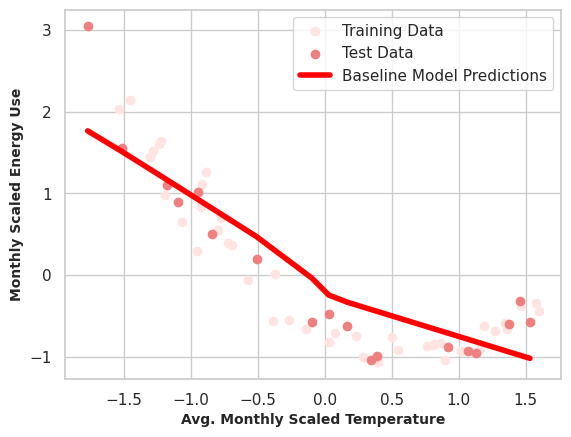

In [ ]:
# Plot the baseline model
idx_m_ca = np.argsort(X_nn_m_ca_bas_test.flatten())
plot_X_nn_m_ca_bas_test = X_nn_m_ca_bas_test[idx_m_ca]
plot_y_m_ca_bas_pred = y_m_ca_bas_pred.flatten()[idx_m_ca]

# Plot the actual data and model 1 predictions
print("Baseline Model MAE:")
print(mae_m_ca_bas_value)
print("R2 Score:")
print(r2_result_m_ca_bas)
plt.scatter(X_nn_m_ca_bas_train, y_nn_m_ca_bas_train, label='Training Data', color='mistyrose')
plt.scatter(X_nn_m_ca_bas_test, y_nn_m_ca_bas_test, label='Test Data', color='lightcoral')
plt.plot(plot_X_nn_m_ca_bas_test, plot_y_m_ca_bas_pred, label='Baseline Model Predictions', color='red', linewidth=4)
plt.xlabel('Avg. Monthly Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
# NEXT WORK WITH ANALYSIS YEAR (2024)
# Feature Scaling (necessary for data to be scaled down ahead of NN processing)
X_m_ca_temp_ana = sc_Xd.fit_transform(b1_monthly_2024[['Temp']])
Y_m_ca_ener_ana = sc_yd.fit_transform(b1_monthly_2024[['EnergyUse']])

In [ ]:
# Assign data (using just 2024)
X_m_ca_ana_nn = X_m_ca_temp_ana.astype(float)
y_m_ca_ana_nn = Y_m_ca_ener_ana.astype(float)

# Split into training and testing for 2024 (30% test, 70% train)
X_nn_m_ca_ana_train, X_nn_m_ca_ana_test, y_nn_m_ca_ana_train, y_nn_m_ca_ana_test = train_test_split(X_m_ca_ana_nn, y_m_ca_ana_nn, test_size=0.3, random_state=42)

In [ ]:
# Create NN for the data to be analyzed (2024)
model_m_ca_ana = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_an.summary()

In [ ]:
# Compile the analysis model with loss function and optimizer
model_m_ca_ana.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

In [ ]:
# Train analysis model
# Adjust the number of epochs and batch size based on your data and resources.
model_m_ca_ana.fit(X_nn_m_ca_ana_train, y_nn_m_ca_ana_train, epochs=25, batch_size=32, validation_data=(X_nn_m_ca_ana_test, y_nn_m_ca_ana_test))

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - MeanAbsoluteError: 0.6979 - loss: 0.6455 - val_MeanAbsoluteError: 0.9597 - val_loss: 1.3171
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - MeanAbsoluteError: 0.6628 - loss: 0.6015 - val_MeanAbsoluteError: 0.9423 - val_loss: 1.2651
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - MeanAbsoluteError: 0.6288 - loss: 0.5623 - val_MeanAbsoluteError: 0.9276 - val_loss: 1.2188
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - MeanAbsoluteError: 0.5989 - loss: 0.5294 - val_MeanAbsoluteError: 0.9136 - val_loss: 1.1746
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - MeanAbsoluteError: 0.5773 - loss: 0.4996 - val_MeanAbsoluteError: 0.8999 - val_loss: 1.1328
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - MeanAbsoluteError: 0.5624 - loss: 0.4730 - val_MeanAbsoluteError: 0.8873 - val_loss: 1.0953
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - MeanAbsoluteError: 0.5483 - loss: 0.4501 - val_MeanAbsoluteError: 0.8751 - val_loss: 1.05

In [ ]:
# Make predicition using trained analysis model
y_pred_m_ca_ana = model_m_ca_ana.predict(X_nn_m_ca_ana_test)
y_pred_m_ca_ana = y_pred_m_ca_ana.astype(float)

# Extract the MAE
mae_loss_m_ca_ana, mae_value_m_ca_ana = model_m_ca_ana.evaluate(X_nn_m_ca_ana_test, y_nn_m_ca_ana_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred1, just evaluates the model

# Extract the R2 Value
r2metric_m_ca_ana = keras.metrics.R2Score()
r2metric_m_ca_ana.update_state(y_nn_m_ca_ana_test, y_pred_m_ca_ana)
r2_result_m_ca_ana = r2metric_m_ca_ana.result()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Analysis Model MAE:
0.7477942705154419
R2 Score:
tf.Tensor(0.57130384, shape=(), dtype=float32)


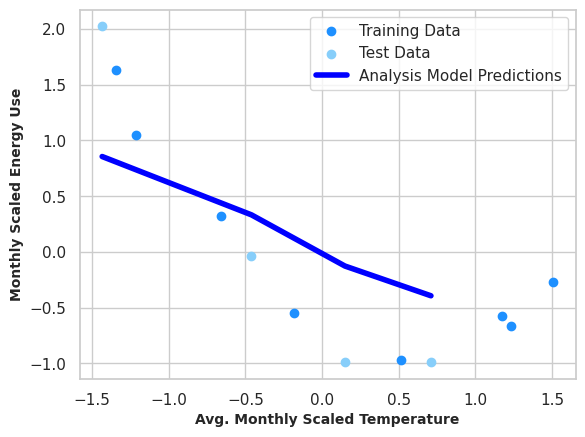

In [ ]:
# Plot the analysis model
idx_m_ca_ana = np.argsort(X_nn_m_ca_ana_test.flatten())
plot_X_nn_m_ca_ana_test = X_nn_m_ca_ana_test[idx_m_ca_ana]
plot_y_pred_m_ca_ana = y_pred_m_ca_ana.flatten()[idx_m_ca_ana]

# Plot the actual data and model predictions
print("Analysis Model MAE:")
print(mae_value_m_ca_ana)
print("R2 Score:")
print(r2_result_m_ca_ana)
sns.set(style='whitegrid')
plt.scatter(X_nn_m_ca_ana_train, y_nn_m_ca_ana_train, label='Training Data', color='dodgerblue')
plt.scatter(X_nn_m_ca_ana_test, y_nn_m_ca_ana_test, label='Test Data', color='lightskyblue')
plt.plot(plot_X_nn_m_ca_ana_test, plot_y_pred_m_ca_ana, label='Analysis Model Predictions', color='blue', linewidth=4)
plt.xlabel('Avg. Monthly Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

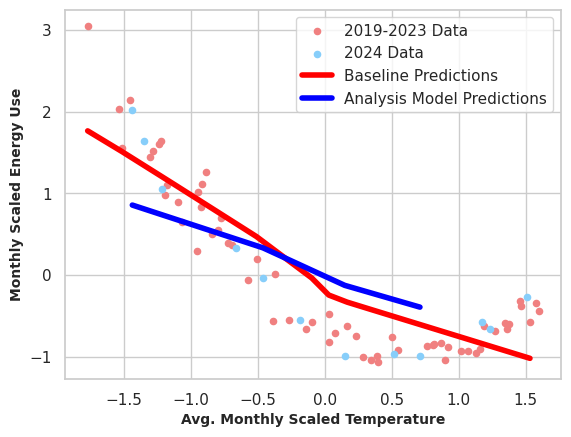

In [ ]:
# Combine baseline plot and analysis plot
plt.scatter(X_m_ca_bas_nn, y_m_ca_bas_nn, label='2019-2023 Data', s=20, color='lightcoral')
plt.scatter(X_m_ca_temp_ana, Y_m_ca_ener_ana, label='2024 Data', s=20, color='lightskyblue')

plt.plot(plot_X_nn_m_ca_bas_test, plot_y_m_ca_bas_pred, label='Baseline Predictions', color='red', linewidth=4)
plt.plot(plot_X_nn_m_ca_ana_test, plot_y_pred_m_ca_ana, label='Analysis Model Predictions', color='blue', linewidth=4)
plt.xlabel('Avg. Monthly Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

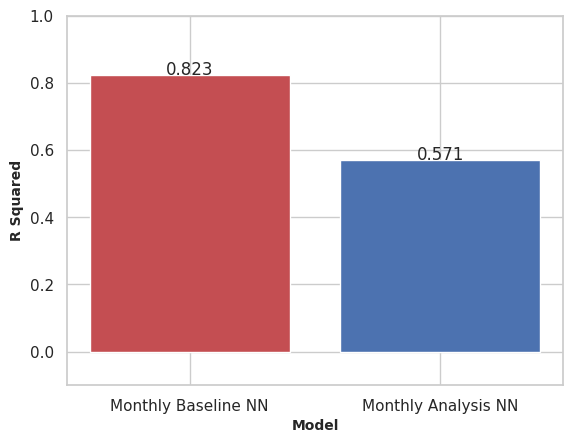

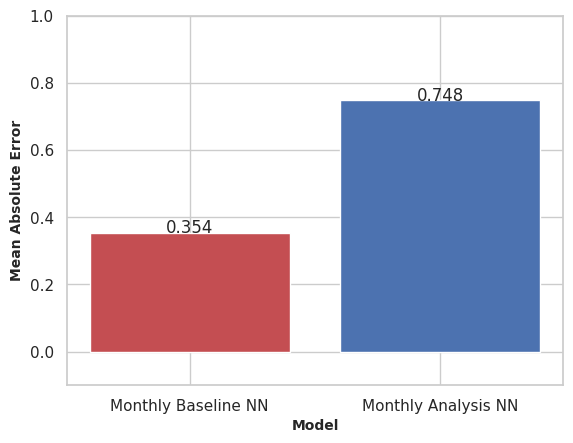

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between the BASELINE and ANALYSIS model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_m_ca_x_r2 = ["Monthly Baseline NN", "Monthly Analysis NN"]
label_m_ca_y_r2 = [0.823, 0.571]

plt.bar(bar_positions[0], r2_result_m_ca_bas, color ='r', edgecolor ='w', label ='Monthly Baseline NN R2')
plt.bar(bar_positions[1], r2_result_m_ca_ana, color ='b', edgecolor ='w', label ='Monthly Analysis NN R2')
plt.xticks(bar_positions, ['Monthly Baseline NN', 'Monthly Analysis NN'])

add_labels(label_m_ca_x_r2, label_m_ca_y_r2)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_m_ca_x_mae = ["Monthly Baseline NN", "Monthly Analysis NN"]
label_m_ca_y_mae = [0.354, 0.748]

plt.bar(bar_positions[0], mae_m_ca_bas_value, color ='r', edgecolor ='w', label ='Monthly Baseline NN MAE')
plt.bar(bar_positions[1], mae_value_m_ca_ana, color ='b', edgecolor ='w', label ='Monthly Analysis NN MAE')
plt.xticks(bar_positions, ['Monthly Baseline NN', 'Monthly Analysis NN'])

add_labels(label_m_ca_x_mae, label_m_ca_y_mae)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, Neural Network (Comparitive Analysis, Daily)

In [ ]:
# Start with Daily Data, Temperature & Energy Use
# Seperate Data by Year (DAILY)
b1_daily_1921 = b1_daily_df[(b1_daily_df['Year'] == 2019) | (b1_daily_df['Year'] == 2020) | (b1_daily_df['Year'] == 2021)] # "Baseline" Years
b1_daily_2022 = b1_daily_df[(b1_daily_df['Year'] == 2022)] # "Subject" Year

b1_daily_2019 = b1_daily_df[(b1_daily_df['Year'] == 2019)]
b1_daily_2020 = b1_daily_df[(b1_daily_df['Year'] == 2020)]
b1_daily_2021 = b1_daily_df[(b1_daily_df['Year'] == 2021)]

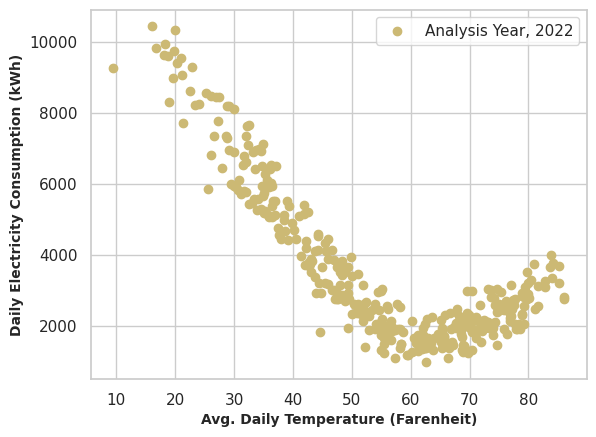

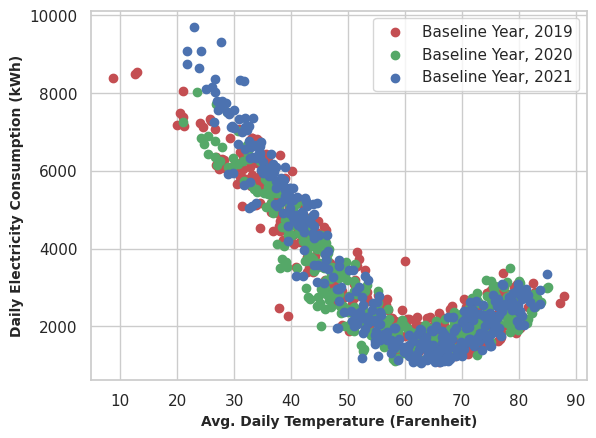

In [ ]:
# Seperately plot the baseline years and the "test" or "analysis" year
sns.set(style='whitegrid')
plt.scatter(b1_daily_2022['Temp'], b1_daily_2022['EnergyUse'], label='Analysis Year, 2022', color='y')
plt.xlabel('Avg. Daily Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Daily Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

sns.set(style='whitegrid')
plt.scatter(b1_daily_2019['Temp'], b1_daily_2019['EnergyUse'], label='Baseline Year, 2019', color='r')
plt.scatter(b1_daily_2020['Temp'], b1_daily_2020['EnergyUse'], label='Baseline Year, 2020', color='g')
plt.scatter(b1_daily_2021['Temp'], b1_daily_2021['EnergyUse'], label='Baseline Year, 2021', color='b')
plt.xlabel('Avg. Daily Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Daily Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
# START WITH BASELINE YEARS (2019-2021)
X_d_temp = sc_Xd.fit_transform(b1_daily_1921[['Temp']])
Y_d_ener = sc_yd.fit_transform(b1_daily_1921[['EnergyUse']])

In [ ]:
# Assign data (using just 2019-2021)
X_nn = X_d_temp.astype(float)
y_nn = Y_d_ener.astype(float)

# Split into training and testing for 2019-2021 (30% test, 70% train)
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, test_size=0.3, random_state=42)

In [ ]:
# Create series of neural network models, each slightly different (ENDED UP CHOOSING MODEL 2)
'''
model1 = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)                  # Output layer with a single neuron (for regression)
])
model1.summary()
'''
model2 = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model2.summary()
'''
model3 = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
model3.summary()
'''

"\nmodel3 = keras.Sequential([\n    layers.Input(shape=(1,)),        # Input layer\n    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation\n    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation\n    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation\n    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation\n    layers.Dense(1)                  # Output layer\n])\nmodel3.summary()\n"

In [ ]:
# Compile model 1 with loss function and optimizer
# model1.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

# Compile model 2 with loss function and optimizer
model2.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

# Compile model 3 with loss function and optimizer
# model3.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

In [ ]:
# Train model 1
# Adjust the number of epochs and batch size based on your data and resources.
model1.fit(X_nn_train, y_nn_train, epochs=25, batch_size=32, validation_data=(X_nn_test, y_nn_test))

Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MeanAbsoluteError: 0.8348 - loss: 0.9426 - val_MeanAbsoluteError: 0.7404 - val_loss: 0.8143
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - MeanAbsoluteError: 0.6872 - loss: 0.6645 - val_MeanAbsoluteError: 0.6152 - val_loss: 0.5990
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - MeanAbsoluteError: 0.5908 - loss: 0.5179 - val_MeanAbsoluteError: 0.5420 - val_loss: 0.4629
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MeanAbsoluteError: 0.4918 - loss: 0.3711 - val_MeanAbsoluteError: 0.4947 - val_loss: 0.3795
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - MeanAbsoluteError: 0.4697 - loss: 0.3332 - val_MeanAbsoluteError: 0.4616 - val_loss: 0.3275
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MeanAbsoluteError: 0.4309 - loss: 0.2742 - val_MeanAbsoluteError: 0.4350 - val_loss: 0.2900
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - MeanAbsoluteError: 0.4155 - loss: 0.2597 - val_MeanAbsoluteError: 0.4068 - val_los

In [ ]:
# Make predicition using trained model
y_pred1 = model1.predict(X_nn_test)
y_pred1 = y_pred1.astype(float)

# Extract the MAE
mae_loss1, mae_value1 = model1.evaluate(X_nn_test, y_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred1, just evaluates the model

# Extract the R2 Value
r2metric1 = keras.metrics.R2Score()
r2metric1.update_state(y_nn_test, y_pred1)
r2_result1 = r2metric1.result()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Train model 2
# Adjust the number of epochs and batch size based on your data and resources.
model2.fit(X_nn_train, y_nn_train, epochs=25, batch_size=32, validation_data=(X_nn_test, y_nn_test))

Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - MeanAbsoluteError: 0.6587 - loss: 0.6666 - val_MeanAbsoluteError: 0.5045 - val_loss: 0.3736
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MeanAbsoluteError: 0.4553 - loss: 0.2911 - val_MeanAbsoluteError: 0.3894 - val_loss: 0.2282
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MeanAbsoluteError: 0.3657 - loss: 0.1978 - val_MeanAbsoluteError: 0.3135 - val_loss: 0.1527
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MeanAbsoluteError: 0.2877 - loss: 0.1213 - val_MeanAbsoluteError: 0.2710 - val_loss: 0.1154
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MeanAbsoluteError: 0.2445 - loss: 0.0923 - val_MeanAbsoluteError: 0.2555 - val_loss: 0.1038
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MeanAbsoluteError: 0.2379 - loss: 0.0875 - val_MeanAbsoluteError: 0.2445 - val_loss: 0.0971
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MeanAbsoluteError: 0.2329 - loss: 0.0886 - val_MeanAbsoluteError: 0.2393 - val_loss

In [ ]:
# Make predicition using trained model
y_pred2 = model2.predict(X_nn_test)
y_pred2 = y_pred2.astype(float)

# Extract the MAE
mae_loss2, mae_value2 = model2.evaluate(X_nn_test, y_nn_test, verbose=0)

# Extract the R2 Value
r2metric2 = keras.metrics.R2Score()
r2metric2.update_state(y_nn_test, y_pred2)
r2_result2 = r2metric2.result()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
# Train model 3
# Adjust the number of epochs and batch size based on your data and resources.
model3.fit(X_nn_train, y_nn_train, epochs=25, batch_size=32, validation_data=(X_nn_test, y_nn_test))

Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - MeanAbsoluteError: 0.6449 - loss: 0.6153 - val_MeanAbsoluteError: 0.3690 - val_loss: 0.2042
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MeanAbsoluteError: 0.3460 - loss: 0.1746 - val_MeanAbsoluteError: 0.2612 - val_loss: 0.1071
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MeanAbsoluteError: 0.2495 - loss: 0.0956 - val_MeanAbsoluteError: 0.2549 - val_loss: 0.1085
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MeanAbsoluteError: 0.2531 - loss: 0.1036 - val_MeanAbsoluteError: 0.2441 - val_loss: 0.0996
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MeanAbsoluteError: 0.2515 - loss: 0.1070 - val_MeanAbsoluteError: 0.2492 - val_loss: 0.1078
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MeanAbsoluteError: 0.2294 - loss: 0.0828 - val_MeanAbsoluteError: 0.2357 - val_loss: 0.0965
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MeanAbsoluteError: 0.2206 - loss: 0.0780 - val_MeanAbsoluteError: 0.2311 - val_loss

In [ ]:
# Make predicition using trained model
y_pred3 = model3.predict(X_nn_test)
y_pred3 = y_pred3.astype(float)

# Extract the MAE
mae_loss3, mae_value3 = model3.evaluate(X_nn_test, y_nn_test, verbose=0)

# Extract the R2 Value
r2metric3 = keras.metrics.R2Score()
r2metric3.update_state(y_nn_test, y_pred3)
r2_result3 = r2metric3.result()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Model 2 MAE:
0.22831054031848907
R2 Score:
tf.Tensor(0.9173371, shape=(), dtype=float32)


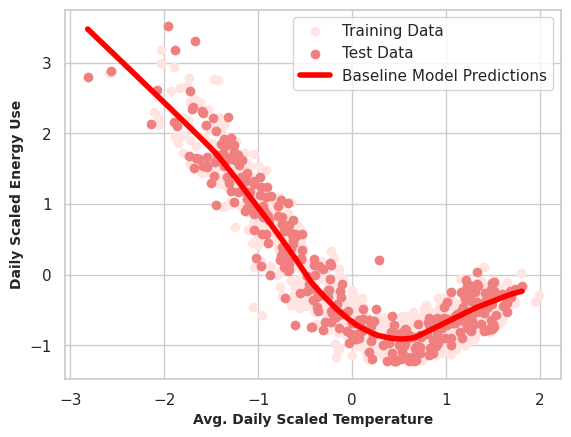

'\n# Plot the actual data and model 3 predictions\nprint("Model 3 MAE:")\nprint(mae_value3)\nprint("R2 Score:")\nprint(r2_result3)\nsns.set(style=\'whitegrid\')\nplt.scatter(X_nn_train, y_nn_train, label=\'Training Data\', color=\'lightblue\')\nplt.scatter(X_nn_test, y_nn_test, label=\'Test Data\', color=\'lightcoral\')\nplt.plot(plot_X_nn_test, plot_y_pred3, label=\'Model 3 Predictions\', color=\'red\', linewidth=4)\nplt.xlabel(\'Temperature\')\nplt.ylabel(\'Energy Use\')\nplt.legend()\nplt.show()\n'

In [ ]:
idx = np.argsort(X_nn_test.flatten())
plot_X_nn_test = X_nn_test[idx]
# plot_y_pred1 = y_pred1.flatten()[idx]
plot_y_pred2 = y_pred2.flatten()[idx]
# plot_y_pred3 = y_pred3.flatten()[idx]
'''
# Plot the actual data and model 1 predictions
print("Model 1 MAE:")
print(mae_value1)
print("R2 Score:")
print(r2_result1)
sns.set(style='whitegrid')
plt.scatter(X_nn_train, y_nn_train, label='Training Data', color='lightblue')
plt.scatter(X_nn_test, y_nn_test, label='Test Data', color='lightcoral')
plt.plot(plot_X_nn_test, plot_y_pred1, label='Model 1 Predictions', color='red', linewidth=4)
plt.xlabel('Temperature')
plt.ylabel('Energy Use')
plt.legend()
plt.show()
'''
# Plot the actual data and model 2 predictions
print("Model 2 MAE:")
print(mae_value2)
print("R2 Score:")
print(r2_result2)
sns.set(style='whitegrid')
plt.scatter(X_nn_train, y_nn_train, label='Training Data', color='mistyrose')
plt.scatter(X_nn_test, y_nn_test, label='Test Data', color='lightcoral')
plt.plot(plot_X_nn_test, plot_y_pred2, label='Baseline Model Predictions', color='red', linewidth=4)
plt.xlabel('Avg. Daily Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Daily Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()
'''
# Plot the actual data and model 3 predictions
print("Model 3 MAE:")
print(mae_value3)
print("R2 Score:")
print(r2_result3)
sns.set(style='whitegrid')
plt.scatter(X_nn_train, y_nn_train, label='Training Data', color='lightblue')
plt.scatter(X_nn_test, y_nn_test, label='Test Data', color='lightcoral')
plt.plot(plot_X_nn_test, plot_y_pred3, label='Model 3 Predictions', color='red', linewidth=4)
plt.xlabel('Temperature')
plt.ylabel('Energy Use')
plt.legend()
plt.show()
'''

In [ ]:
# NEXT WORK WITH ANALYSIS YEARS (2022)
# Feature Scaling (necessary for data to be scaled down ahead of NN processing)
X_d_temp_an = sc_Xd.fit_transform(b1_daily_2022[['Temp']])
Y_d_ener_an = sc_yd.fit_transform(b1_daily_2022[['EnergyUse']])

In [ ]:
# Assign data (using just 2022)
X_nn_an = X_d_temp_an.astype(float)
y_nn_an = Y_d_ener_an.astype(float)

# Split into training and testing for 2022 (30% test, 70% train)
X_nn_train_an, X_nn_test_an, y_nn_train_an, y_nn_test_an = train_test_split(X_nn_an, y_nn_an, test_size=0.3, random_state=42)

In [ ]:
# Create NN for the data to be analyzed (2022)
model_an = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_an.summary()

In [ ]:
# Compile the analysis model with loss function and optimizer
model_an.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

In [ ]:
# Train analysis model
# Adjust the number of epochs and batch size based on your data and resources.
model_an.fit(X_nn_train_an, y_nn_train_an, epochs=25, batch_size=32, validation_data=(X_nn_test_an, y_nn_test_an))

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - MeanAbsoluteError: 0.7481 - loss: 0.8942 - val_MeanAbsoluteError: 0.6442 - val_loss: 0.7214
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - MeanAbsoluteError: 0.6277 - loss: 0.6769 - val_MeanAbsoluteError: 0.5562 - val_loss: 0.5061
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - MeanAbsoluteError: 0.5146 - loss: 0.4170 - val_MeanAbsoluteError: 0.4936 - val_loss: 0.3786
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - MeanAbsoluteError: 0.4742 - loss: 0.3508 - val_MeanAbsoluteError: 0.4380 - val_loss: 0.2911
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - MeanAbsoluteError: 0.4329 - loss: 0.2685 - val_MeanAbsoluteError: 0.3972 - val_loss: 0.2300
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - MeanAbsoluteError: 0.3820 - loss: 0.2029 - val_MeanAbsoluteError: 0.3646 - val_loss: 0.1887
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - MeanAbsoluteError: 0.3557 - loss: 0.1788 - val_MeanAbsoluteError: 0.3278 - val_loss: 0.1523

In [ ]:
# Make predicition using trained analysis model
y_pred_an = model_an.predict(X_nn_test_an)
y_pred_an = y_pred_an.astype(float)

# Extract the MAE
mae_loss_an, mae_value_an = model_an.evaluate(X_nn_test_an, y_nn_test_an, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred1, just evaluates the model

# Extract the R2 Value
r2metric_an = keras.metrics.R2Score()
r2metric_an.update_state(y_nn_test_an, y_pred_an)
r2_result_an = r2metric_an.result()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Analysis Model MAE:
0.20306916534900665
R2 Score:
tf.Tensor(0.93820417, shape=(), dtype=float32)


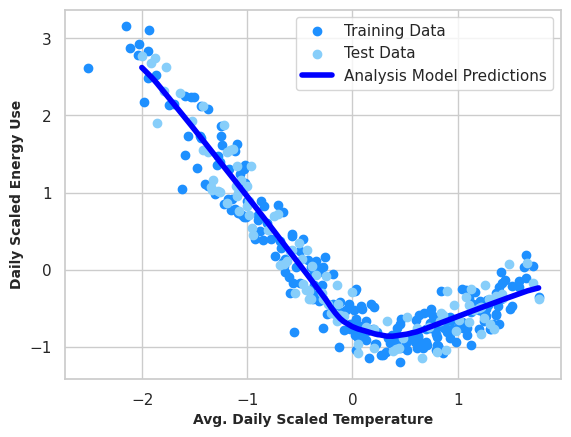

In [ ]:
# Plot the analysis model
idx = np.argsort(X_nn_test_an.flatten())
plot_X_nn_test_an = X_nn_test_an[idx]
plot_y_pred_an = y_pred_an.flatten()[idx]

# Plot the actual data and model 1 predictions
print("Analysis Model MAE:")
print(mae_value_an)
print("R2 Score:")
print(r2_result_an)
sns.set(style='whitegrid')
plt.scatter(X_nn_train_an, y_nn_train_an, label='Training Data', color='dodgerblue')
plt.scatter(X_nn_test_an, y_nn_test_an, label='Test Data', color='lightskyblue')
plt.plot(plot_X_nn_test_an, plot_y_pred_an, label='Analysis Model Predictions', color='blue', linewidth=4)
plt.xlabel('Avg. Daily Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Daily Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

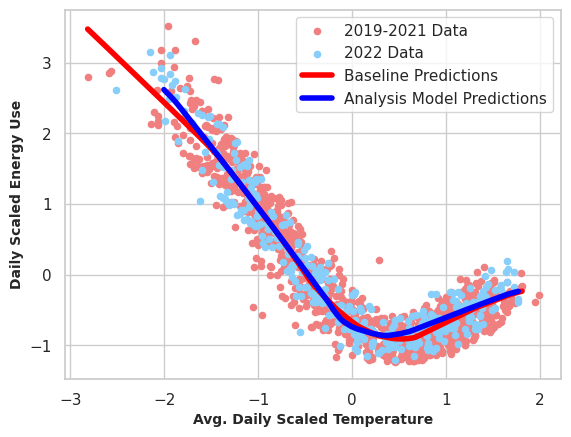

In [ ]:
# Combine baseline plot and analysis plot
plt.scatter(X_nn, y_nn, label='2019-2021 Data', s=20, color='lightcoral')
plt.scatter(X_nn_an, y_nn_an, label='2022 Data', s=20, color='lightskyblue')

plt.plot(plot_X_nn_test, plot_y_pred2, label='Baseline Predictions', color='red', linewidth=4)
plt.plot(plot_X_nn_test_an, plot_y_pred_an, label='Analysis Model Predictions', color='blue', linewidth=4)
plt.xlabel('Avg. Daily Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Daily Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

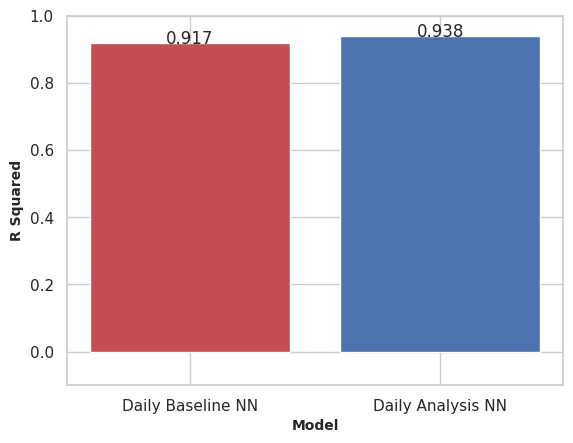

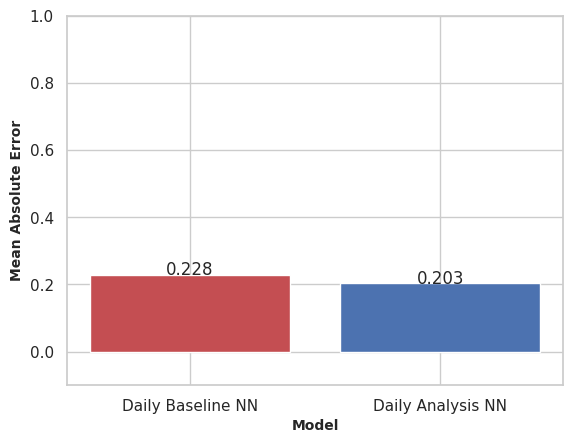

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between the BASELINE and ANALYSIS model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_d_ca_x_r2 = ["Daily Baseline NN", "Daily Analysis NN"]
label_d_ca_y_r2 = [0.917, 0.938]

plt.bar(bar_positions[0], r2_result2, color ='r', edgecolor ='w', label ='Daily Baseline NN R2')
plt.bar(bar_positions[1], r2_result_an, color ='b', edgecolor ='w', label ='Daily Analysis NN R2')
plt.xticks(bar_positions, ['Daily Baseline NN', 'Daily Analysis NN'])

add_labels(label_d_ca_x_r2, label_d_ca_y_r2)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_d_ca_x_mae = ["Daily Baseline NN", "Daily Analysis NN"]
label_d_ca_y_mae = [0.228, 0.203]

plt.bar(bar_positions[0], mae_value2, color ='r', edgecolor ='w', label ='Daily Baseline NN MAE')
plt.bar(bar_positions[1], mae_value_an, color ='b', edgecolor ='w', label ='Daily Analysis NN MAE')
plt.xticks(bar_positions, ['Daily Baseline NN', 'Daily Analysis NN'])

add_labels(label_d_ca_x_mae, label_d_ca_y_mae)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, Neural Network (Comparitive Analysis, Hourly)

In [ ]:
# Hourly Data, Temperature & Energy Use
# Seperate Data by Year (DAILY)
b1_hourly_1921 = b1_hourly_df[(b1_hourly_df['Year'] == 2019) | (b1_hourly_df['Year'] == 2020) | (b1_hourly_df['Year'] == 2021)] # "Baseline" Years
b1_hourly_2022 = b1_hourly_df[(b1_hourly_df['Year'] == 2022)] # "Subject" Year

b1_hourly_2019 = b1_hourly_df[(b1_hourly_df['Year'] == 2019)]
b1_hourly_2020 = b1_hourly_df[(b1_hourly_df['Year'] == 2020)]
b1_hourly_2021 = b1_hourly_df[(b1_hourly_df['Year'] == 2021)]

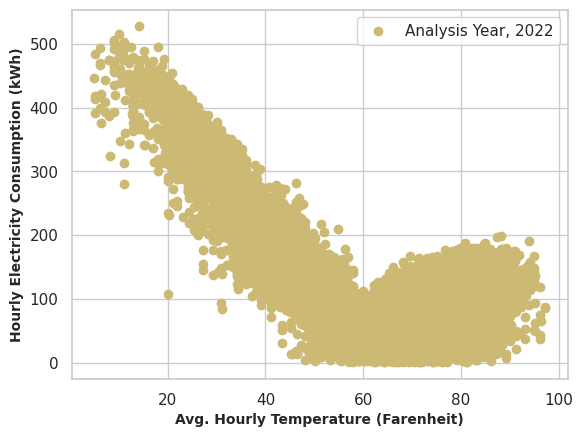

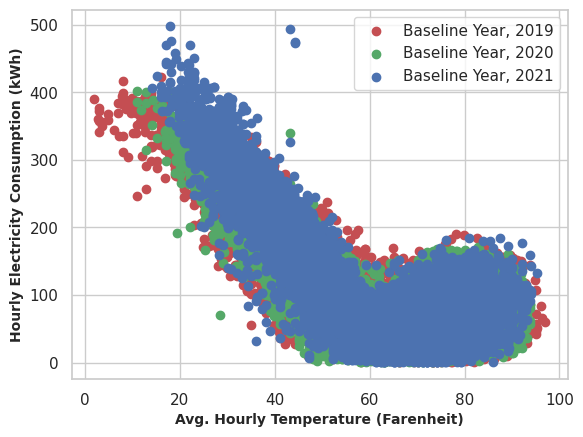

In [ ]:
# Seperately plot the baseline years and the "test" or "analysis" year
sns.set(style='whitegrid')
plt.scatter(b1_hourly_2022['Temp'], b1_hourly_2022['EnergyUse'], label='Analysis Year, 2022', color='y')
plt.xlabel('Avg. Hourly Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Hourly Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

sns.set(style='whitegrid')
plt.scatter(b1_hourly_2019['Temp'], b1_hourly_2019['EnergyUse'], label='Baseline Year, 2019', color='r')
plt.scatter(b1_hourly_2020['Temp'], b1_hourly_2020['EnergyUse'], label='Baseline Year, 2020', color='g')
plt.scatter(b1_hourly_2021['Temp'], b1_hourly_2021['EnergyUse'], label='Baseline Year, 2021', color='b')
plt.xlabel('Avg. Hourly Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Hourly Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
# START WITH BASELINE YEARS (2019-2021)
# Feature Scaling (necessary for data to be scaled down ahead of NN processing)
X_h_temp_bas = sc_Xd.fit_transform(b1_hourly_1921[['Temp']])
Y_h_ener_bas = sc_yd.fit_transform(b1_hourly_1921[['EnergyUse']])

In [ ]:
# Assign data (using just 2019-2021)
X_h_nn_bas = X_h_temp_bas.astype(float)
y_h_nn_bas = Y_h_ener_bas.astype(float)

# Split into training and testing for 2019-2021 (30% test, 70% train)
X_h_nn_bas_train, X_h_nn_bas_test, y_h_nn_bas_train, y_h_nn_bas_test = train_test_split(X_h_nn_bas, y_h_nn_bas, test_size=0.3, random_state=42)

In [ ]:
model_h_bas = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_h_bas.summary()

In [ ]:
# Compile the baseline model with loss function and optimizer
model_h_bas.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

In [ ]:
# Train baseline model
# Adjust the number of epochs and batch size based on your data and resources.
model_h_bas.fit(X_h_nn_bas_train, y_h_nn_bas_train, epochs=25, batch_size=32, validation_data=(X_h_nn_bas_test, y_h_nn_bas_test))

Epoch 1/25
576/576 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - MeanAbsoluteError: 0.4010 - loss: 0.2733 - val_MeanAbsoluteError: 0.3368 - val_loss: 0.1931
Epoch 2/25
576/576 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - MeanAbsoluteError: 0.3372 - loss: 0.1930 - val_MeanAbsoluteError: 0.3413 - val_loss: 0.1949
Epoch 3/25
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - MeanAbsoluteError: 0.3445 - loss: 0.2009 - val_MeanAbsoluteError: 0.3411 - val_loss: 0.1913
Epoch 4/25
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.3380 - loss: 0.1935 - val_MeanAbsoluteError: 0.3366 - val_loss: 0.1902
Epoch 5/25
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.3381 - loss: 0.1949 - val_MeanAbsoluteError: 0.3374 - val_loss: 0.1905
Epoch 6/25
576/576 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - MeanAbsoluteError: 0.3388 - loss: 0.1948 - val_MeanAbsoluteError: 0.3395 - val_loss: 0.1906
Epoch 7/25
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.3404 - loss: 0.1945 - val_MeanAbsoluteError: 0.33

In [ ]:
# Make predicition using trained baseline model
y_h_bas_pred = model_h_bas.predict(X_h_nn_bas_test)
y_h_bas_pred = y_h_bas_pred.astype(float)

# Extract the MAE
mae_h_bas_loss, mae_h_bas_value = model_h_bas.evaluate(X_h_nn_bas_test, y_h_nn_bas_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred1, just evaluates the model

# Extract the R2 Value
r2metric_h_bas = keras.metrics.R2Score()
r2metric_h_bas.update_state(y_h_nn_bas_test, y_h_bas_pred)
r2_result_h_bas = r2metric_h_bas.result()

247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Baseline Model MAE:
0.3382801115512848
R2 Score:
tf.Tensor(0.81265557, shape=(), dtype=float32)


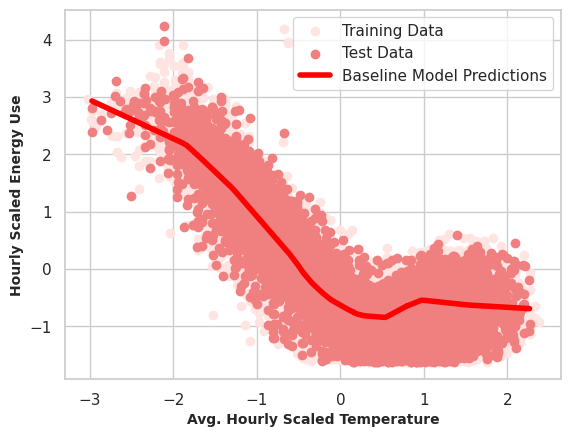

In [ ]:
# Plot the baseline model
idx = np.argsort(X_h_nn_bas_test.flatten())
plot_X_h_nn_bas_test = X_h_nn_bas_test[idx]
plot_y_h_bas_pred = y_h_bas_pred.flatten()[idx]

# Plot the actual data and model 1 predictions
print("Baseline Model MAE:")
print(mae_h_bas_value)
print("R2 Score:")
print(r2_result_h_bas)
plt.scatter(X_h_nn_bas_train, y_h_nn_bas_train, label='Training Data', color='mistyrose')
plt.scatter(X_h_nn_bas_test, y_h_nn_bas_test, label='Test Data', color='lightcoral')
plt.plot(plot_X_h_nn_bas_test, plot_y_h_bas_pred, label='Baseline Model Predictions', color='red', linewidth=4)
plt.xlabel('Avg. Hourly Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Hourly Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
# NEXT WORK WITH ANALYSIS YEAR (2022)
# Feature Scaling (necessary for data to be scaled down ahead of NN processing)
X_h_temp_ana = sc_Xd.fit_transform(b1_hourly_2022[['Temp']])
Y_h_ener_ana = sc_yd.fit_transform(b1_hourly_2022[['EnergyUse']])

In [ ]:
# Assign data (using 2022)
X_h_nn_ana = X_h_temp_ana.astype(float)
y_h_nn_ana = Y_h_ener_ana.astype(float)

# Split into training and testing for 2022 (30% test, 70% train)
X_h_nn_ana_train, X_h_nn_ana_test, y_h_nn_ana_train, y_h_nn_ana_test = train_test_split(X_h_nn_ana, y_h_nn_ana, test_size=0.3, random_state=42)

In [ ]:
model_h_ana = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_h_ana.summary()

In [ ]:
# Compile the analysis model with loss function and optimizer
model_h_ana.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

In [ ]:
# Train analysis model
# Adjust the number of epochs and batch size based on your data and resources.
model_h_ana.fit(X_h_nn_ana_train, y_h_nn_ana_train, epochs=25, batch_size=32, validation_data=(X_h_nn_ana_test, y_h_nn_ana_test))

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - MeanAbsoluteError: 0.4945 - loss: 0.4140 - val_MeanAbsoluteError: 0.3071 - val_loss: 0.1550
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanAbsoluteError: 0.3064 - loss: 0.1551 - val_MeanAbsoluteError: 0.2991 - val_loss: 0.1463
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3066 - loss: 0.1525 - val_MeanAbsoluteError: 0.2984 - val_loss: 0.1466
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3114 - loss: 0.1565 - val_MeanAbsoluteError: 0.2990 - val_loss: 0.1457
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3064 - loss: 0.1547 - val_MeanAbsoluteError: 0.3020 - val_loss: 0.1481
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3128 - loss: 0.1562 - val_MeanAbsoluteError: 0.3019 - val_loss: 0.1467
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - MeanAbsoluteError: 0.3120 - loss: 0.1563 - val_MeanAbsoluteError: 0.30

In [ ]:
# Make predicition using trained analysis model
y_h_ana_pred = model_h_ana.predict(X_h_nn_ana_test)
y_h_ana_pred = y_h_ana_pred.astype(float)

# Extract the MAE
mae_h_ana_loss, mae_h_ana_value = model_h_ana.evaluate(X_h_nn_ana_test, y_h_nn_ana_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred1, just evaluates the model

# Extract the R2 Value
r2metric_h_ana = keras.metrics.R2Score()
r2metric_h_ana.update_state(y_h_nn_ana_test, y_h_ana_pred)
r2_result_h_ana = r2metric_h_ana.result()

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Analysis Model MAE:
0.3033316135406494
R2 Score:
tf.Tensor(0.8570367, shape=(), dtype=float32)


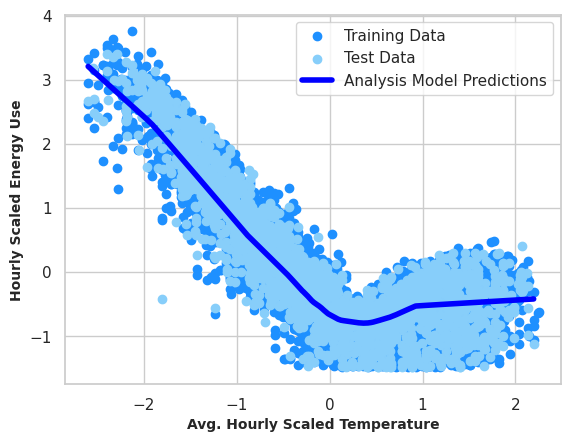

In [ ]:
# Plot the baseline model
idx = np.argsort(X_h_nn_ana_test.flatten())
plot_X_h_nn_ana_test = X_h_nn_ana_test[idx]
plot_y_h_ana_pred = y_h_ana_pred.flatten()[idx]

# Plot the actual data and model 1 predictions
print("Analysis Model MAE:")
print(mae_h_ana_value)
print("R2 Score:")
print(r2_result_h_ana)
plt.scatter(X_h_nn_ana_train, y_h_nn_ana_train, label='Training Data', color='dodgerblue')
plt.scatter(X_h_nn_ana_test, y_h_nn_ana_test, label='Test Data', color='lightskyblue')
plt.plot(plot_X_h_nn_ana_test, plot_y_h_ana_pred, label='Analysis Model Predictions', color='blue', linewidth=4)
plt.xlabel('Avg. Hourly Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Hourly Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

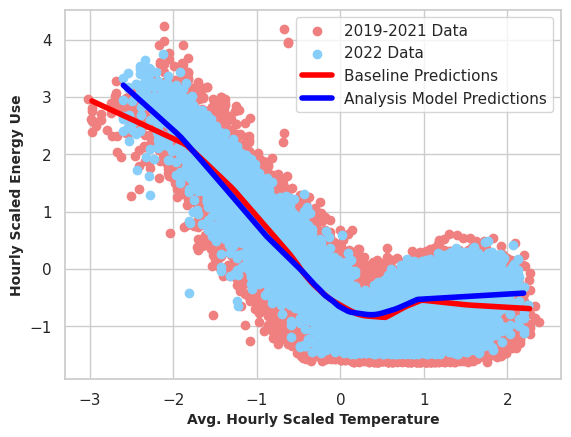

In [ ]:
# Combine baseline plot and analysis plot
plt.scatter(X_h_nn_bas, y_h_nn_bas, label='2019-2021 Data', color='lightcoral')
plt.scatter(X_h_nn_ana, y_h_nn_ana, label='2022 Data', color='lightskyblue')

plt.plot(plot_X_h_nn_bas_test, plot_y_h_bas_pred, label='Baseline Predictions', color='red', linewidth=4)
plt.plot(plot_X_h_nn_ana_test, plot_y_h_ana_pred, label='Analysis Model Predictions', color='blue', linewidth=4)
plt.xlabel('Avg. Hourly Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Hourly Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

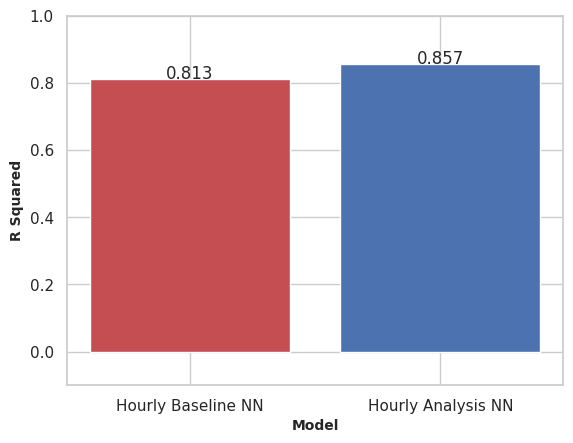

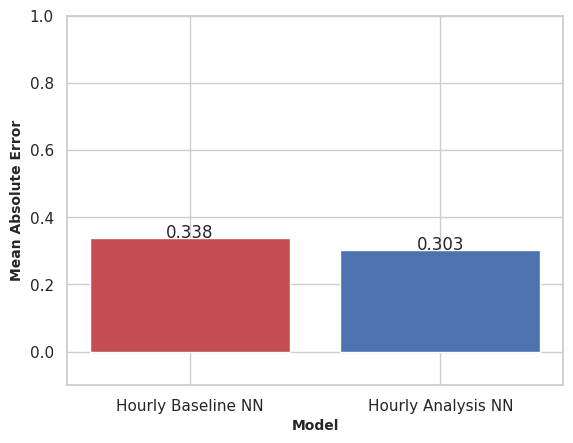

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between the BASELINE and ANALYSIS model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_h_ca_x_r2 = ["Hourly Baseline NN", "Hourly Analysis NN"]
label_h_ca_y_r2 = [0.813, 0.857]

plt.bar(bar_positions[0], r2_result_h_bas, color ='r', edgecolor ='w', label ='Hourly Baseline NN R2')
plt.bar(bar_positions[1], r2_result_h_ana, color ='b', edgecolor ='w', label ='Hourly Analysis NN R2')
plt.xticks(bar_positions, ['Hourly Baseline NN', 'Hourly Analysis NN'])

add_labels(label_h_ca_x_r2, label_h_ca_y_r2)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_h_ca_x_mae = ["Hourly Baseline NN", "Hourly Analysis NN"]
label_h_ca_y_mae = [0.338, 0.303]

plt.bar(bar_positions[0], mae_h_bas_value, color ='r', edgecolor ='w', label ='Hourly Baseline NN MAE')
plt.bar(bar_positions[1], mae_h_ana_value, color ='b', edgecolor ='w', label ='Hourly Analysis NN MAE')
plt.xticks(bar_positions, ['Hourly Baseline NN', 'Hourly Analysis NN'])

add_labels(label_h_ca_x_mae, label_h_ca_y_mae)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, SVR (Comparative Analysis, Monthly)

In [ ]:
# Start with Monthly Data, Temperature & Energy Use
# Seperate Data by Year (MONTHLY)
b1_monthly_1923 = b1_monthly_df[(b1_monthly_df['Year'] == 2019) | (b1_monthly_df['Year'] == 2020) | (b1_monthly_df['Year'] == 2021) | (b1_monthly_df['Year'] == 2022) | (b1_monthly_df['Year'] == 2023)] # "Baseline" Years
b1_monthly_2024 = b1_monthly_df[(b1_monthly_df['Year'] == 2024)] # "Subject" Year

b1_monthly_2019 = b1_monthly_df[(b1_monthly_df['Year'] == 2019)]
b1_monthly_2020 = b1_monthly_df[(b1_monthly_df['Year'] == 2020)]
b1_monthly_2021 = b1_monthly_df[(b1_monthly_df['Year'] == 2021)]
b1_monthly_2022 = b1_monthly_df[(b1_monthly_df['Year'] == 2022)]
b1_monthly_2023 = b1_monthly_df[(b1_monthly_df['Year'] == 2023)]

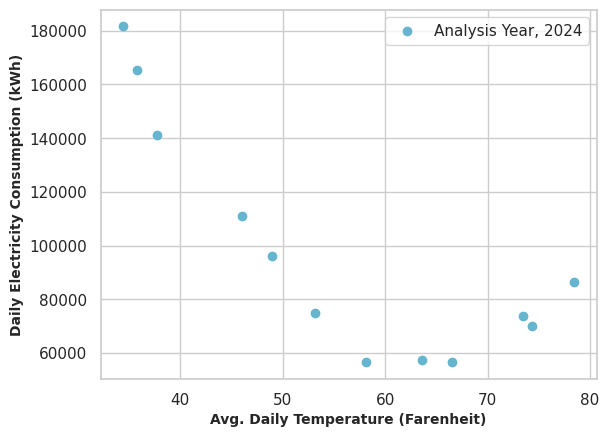

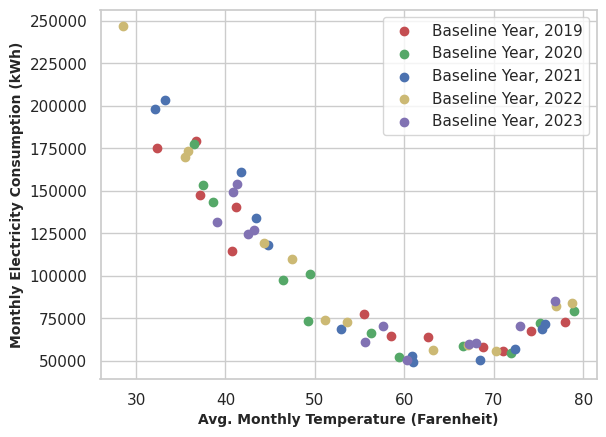

In [ ]:
# Seperately plot the baseline years and the "test" or "analysis" year
sns.set(style='whitegrid')
plt.scatter(b1_monthly_2024['Temp'], b1_monthly_2024['EnergyUse'], label='Analysis Year, 2024', color='c')
plt.xlabel('Avg. Monthly Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

sns.set(style='whitegrid')
plt.scatter(b1_monthly_2019['Temp'], b1_monthly_2019['EnergyUse'], label='Baseline Year, 2019', color='r')
plt.scatter(b1_monthly_2020['Temp'], b1_monthly_2020['EnergyUse'], label='Baseline Year, 2020', color='g')
plt.scatter(b1_monthly_2021['Temp'], b1_monthly_2021['EnergyUse'], label='Baseline Year, 2021', color='b')
plt.scatter(b1_monthly_2022['Temp'], b1_monthly_2022['EnergyUse'], label='Baseline Year, 2022', color='y')
plt.scatter(b1_monthly_2023['Temp'], b1_monthly_2023['EnergyUse'], label='Baseline Year, 2023', color='m')
plt.xlabel('Avg. Monthly Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

# Divide Variables (2019-2021, exclude 2022)
svr_m_bas_x_df = np.array(b1_monthly_1923['Temp'])
svr_m_bas_x_df = svr_m_bas_x_df.reshape(-1, 1)
svr_m_bas_y_df = np.array(b1_monthly_1923['EnergyUse'])
svr_m_bas_y_df = svr_m_bas_y_df.reshape(-1, 1)

svr_m_ana_x_df = np.array(b1_monthly_2024['Temp'])
svr_m_ana_x_df = svr_m_ana_x_df.reshape(-1, 1)
svr_m_ana_y_df = np.array(b1_monthly_2024['EnergyUse'])
svr_m_ana_y_df = svr_m_ana_y_df.reshape(-1, 1)

In [ ]:
# Feature Scaling
svr_m_bas_x = sc_Xd.fit_transform(svr_m_bas_x_df)
svr_m_bas_y = sc_yd.fit_transform(svr_m_bas_y_df)
svr_m_scaleddf = pd.DataFrame(np.hstack((svr_m_bas_x,svr_m_bas_y)), columns=['Temp','EnergyUse'])
svr_m_scaleddf = svr_m_scaleddf.astype(float)

svr_m_scaledtemp = svr_m_scaleddf['Temp']
svr_m_scaledtemp = svr_m_scaledtemp.astype(float)
svr_m_scaledener = svr_m_scaleddf['EnergyUse']
svr_m_scaledener = svr_m_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
X_svr_m_bas_train, X_svr_m_bas_test, Y_svr_m_bas_train, Y_svr_m_bas_test = train_test_split(svr_m_bas_x, svr_m_bas_y, test_size=0.3, random_state=101)

In [ ]:
# Create SVR with Radial Basis Function (RBF) kernal
svr_m_bas = SVR(kernel='rbf')

# Train model with exisiting data
svr_m_bas.fit(X_svr_m_bas_train, Y_svr_m_bas_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

R^2 Error in Predicition: 
0.9020323690631784
Mean Absolute Error:
0.24049271883050855


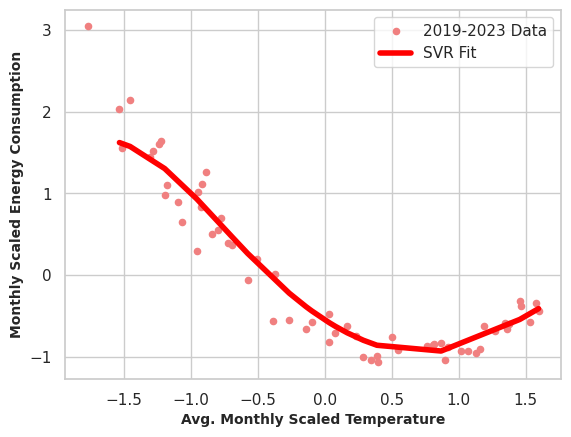

In [ ]:
# Make predicitions on the data
y_svr_m_bas_pred = svr_m_bas.predict(X_svr_m_bas_test)
X_svr_m_bas_plot = pd.DataFrame(X_svr_m_bas_test)
X_svr_m_bas_plot.columns=['x']
y_svr_m_bas_plot = pd.Series(y_svr_m_bas_pred, name='y')
svr_m_bas_plot = pd.concat([X_svr_m_bas_plot, y_svr_m_bas_plot], axis=1)
svr_m_bas_plot_plotsort = svr_m_bas_plot.sort_values(by='x')

# Check performance of prediction
svr_m_bas_r2_score = r2_score(Y_svr_m_bas_test, y_svr_m_bas_pred)
print("R^2 Error in Predicition: ")
print(svr_m_bas_r2_score)
svr_m_bas_mae = mean_absolute_error(Y_svr_m_bas_test, y_svr_m_bas_pred)
print("Mean Absolute Error:")
print(svr_m_bas_mae)

# Plot results
sns.set(style='whitegrid')
plt.scatter(svr_m_scaleddf['Temp'], svr_m_scaleddf['EnergyUse'], color='lightcoral', s=20, label='2019-2023 Data')
plt.plot(svr_m_bas_plot_plotsort['x'], svr_m_bas_plot_plotsort['y'], color="red", linewidth=4, label='SVR Fit')
plt.ylabel("Monthly Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Monthly Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
# Feature Scaling (Analysis Year)
svr_m_ana_x = sc_Xd.fit_transform(svr_m_ana_x_df)
svr_m_ana_y = sc_yd.fit_transform(svr_m_ana_y_df)
svr_m_ana_scaleddf = pd.DataFrame(np.hstack((svr_m_ana_x,svr_m_ana_y)), columns=['Temp','EnergyUse'])
svr_m_ana_scaleddf = svr_m_ana_scaleddf.astype(float)

svr_m_ana_scaledtemp = svr_m_ana_scaleddf['Temp']
svr_m_ana_scaledtemp = svr_m_ana_scaledtemp.astype(float)
svr_m_ana_scaledener = svr_m_ana_scaleddf['EnergyUse']
svr_m_ana_scaledener = svr_m_ana_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
X_svr_m_ana_train, X_svr_m_ana_test, Y_svr_m_ana_train, Y_svr_m_ana_test = train_test_split(svr_m_ana_x, svr_m_ana_y, test_size=0.3, random_state=101)

In [ ]:
# Generate Model and Perform Fit with Preffered Kernel
# Create SVR with Radial Basis Function (RBF) kernal
svr_m_ana = SVR(kernel='rbf')

# Train model with exisiting data
svr_m_ana.fit(X_svr_m_ana_train, Y_svr_m_ana_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

R^2 Error in Predicition: 
0.8771038055927892
Mean Absolute Error:
0.18149944562224357


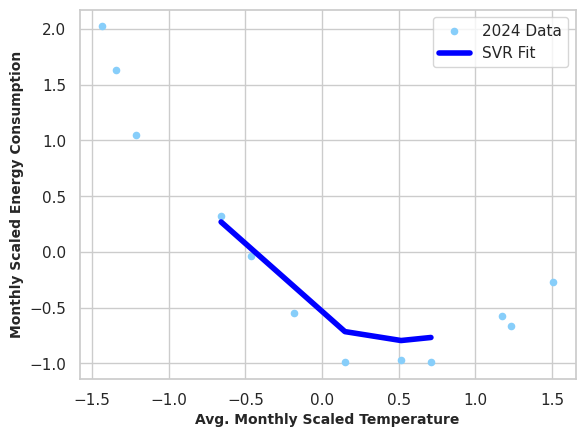

In [ ]:
# Make predicitions on the data
y_svr_m_ana_pred = svr_m_ana.predict(X_svr_m_ana_test)
X_svr_m_ana_plot = pd.DataFrame(X_svr_m_ana_test)
X_svr_m_ana_plot.columns=['x']
y_svr_m_ana_plot = pd.Series(y_svr_m_ana_pred, name='y')
svr_m_ana_plot = pd.concat([X_svr_m_ana_plot, y_svr_m_ana_plot], axis=1)
svr_m_ana_plot_plotsort = svr_m_ana_plot.sort_values(by='x')

# Check performance of prediction
svr_m_ana_r2_score = r2_score(Y_svr_m_ana_test, y_svr_m_ana_pred)
print("R^2 Error in Predicition: ")
print(svr_m_ana_r2_score)

svr_m_ana_mae = mean_absolute_error(Y_svr_m_ana_test, y_svr_m_ana_pred)
print("Mean Absolute Error:")
print(svr_m_ana_mae)

# Plot results
sns.set(style='whitegrid')
plt.scatter(svr_m_ana_scaleddf['Temp'], svr_m_ana_scaleddf['EnergyUse'], color='lightskyblue', s=20, label='2024 Data')
plt.plot(svr_m_ana_plot_plotsort['x'], svr_m_ana_plot_plotsort['y'], color="blue", linewidth=4, label='SVR Fit')
plt.ylabel("Monthly Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Monthly Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

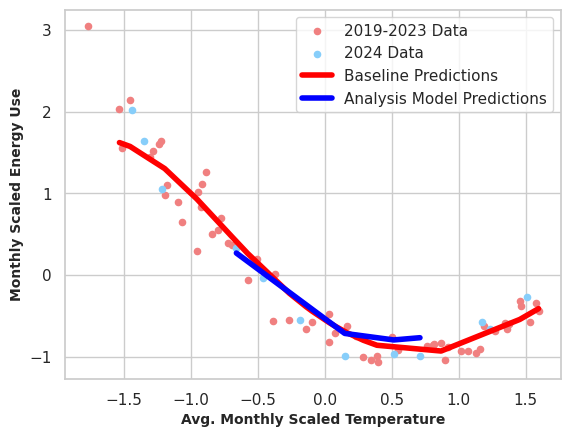

In [ ]:
# Combine baseline plot and analysis plot
plt.scatter(svr_m_scaleddf['Temp'], svr_m_scaleddf['EnergyUse'], label='2019-2023 Data', s=20, color='lightcoral')
plt.scatter(svr_m_ana_scaleddf['Temp'], svr_m_ana_scaleddf['EnergyUse'], label='2024 Data', s=20, color='lightskyblue')

plt.plot(svr_m_bas_plot_plotsort['x'], svr_m_bas_plot_plotsort['y'], label='Baseline Predictions', color='red', linewidth=4)
plt.plot(svr_m_ana_plot_plotsort['x'], svr_m_ana_plot_plotsort['y'], label='Analysis Model Predictions', color='blue', linewidth=4)
plt.xlabel('Avg. Monthly Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

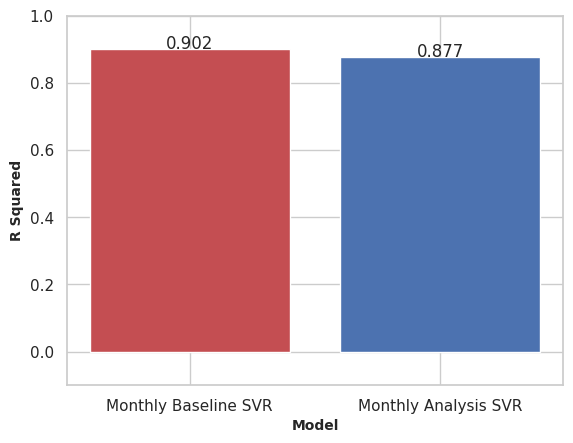

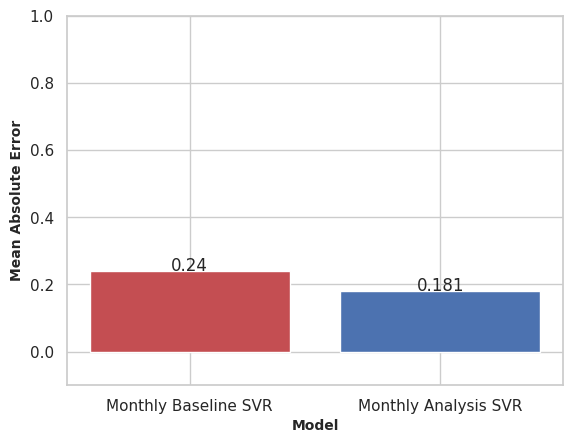

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between the BASELINE and ANALYSIS model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_m_svr_ca_x_r2 = ["Monthly Baseline SVR", "Monthly Analysis SVR"]
label_m_svr_ca_y_r2 = [0.902, 0.877]

plt.bar(bar_positions[0], svr_m_bas_r2_score, color ='r', edgecolor ='w', label ='Monthly Baseline SVR R2')
plt.bar(bar_positions[1], svr_m_ana_r2_score, color ='b', edgecolor ='w', label ='Monthly Analysis SVR R2')
plt.xticks(bar_positions, ['Monthly Baseline SVR', 'Monthly Analysis SVR'])

add_labels(label_m_svr_ca_x_r2, label_m_svr_ca_y_r2)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_m_svr_ca_x_mae = ["Monthly Baseline SVR", "Monthly Analysis SVR"]
label_m_svr_ca_y_mae = [0.240, 0.181]

plt.bar(bar_positions[0], svr_m_bas_mae, color ='r', edgecolor ='w', label ='Monthly Baseline SVR MAE')
plt.bar(bar_positions[1], svr_m_ana_mae, color ='b', edgecolor ='w', label ='Monthly Analysis SVR MAE')
plt.xticks(bar_positions, ['Monthly Baseline SVR', 'Monthly Analysis SVR'])

add_labels(label_m_svr_ca_x_mae, label_m_svr_ca_y_mae)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, SVR (Comparative Analysis, Daily)

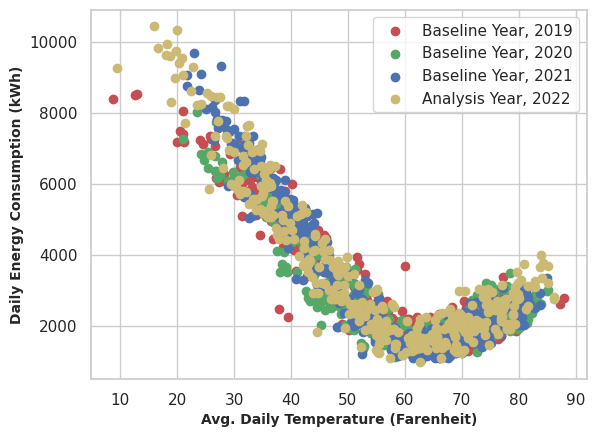

In [ ]:
# Data Re-Arrangement
hq_arr_daily = np.array(df_daily)
hq_rawd = hq_arr_daily[0:1461,0:30]
hq_df_daily = pd.DataFrame({'Year': hq_rawd[:,1],'EnergyUse': hq_rawd[:,6], 'Temp': hq_rawd[:,9], 'Rel Humidity': hq_rawd[:,13]})
hq_df_daily = hq_df_daily.astype(float)
# print(hq_df_daily)

# Filter the DataFrame by Year
filt19_df = b1_daily_df[b1_daily_df['Year'] == 2019]
filt20_df = b1_daily_df[b1_daily_df['Year'] == 2020]
filt21_df = b1_daily_df[b1_daily_df['Year'] == 2021]
filt22_df = b1_daily_df[b1_daily_df['Year'] == 2022]

# Plot to observe raw 2D data
sns.set(style='whitegrid')
plt.scatter(filt19_df['Temp'], filt19_df['EnergyUse'], marker='o', color ='r', label ='Baseline Year, 2019')
plt.scatter(filt20_df['Temp'], filt20_df['EnergyUse'], marker='o', color ='g', label ='Baseline Year, 2020')
plt.scatter(filt21_df['Temp'], filt21_df['EnergyUse'], marker='o', color ='b', label ='Baseline Year, 2021')
plt.scatter(filt22_df['Temp'], filt22_df['EnergyUse'], marker='o', color ='y', label ='Analysis Year, 2022')
plt.xlabel('Avg. Daily Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Daily Energy Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

# Divide Variables (2019-2021, exclude 2022)
filt_d_svr_bas_df = b1_daily_df[b1_daily_df['Year'] != 2022]
svr_d_bas_x_df = np.array(filt_d_svr_bas_df['Temp'])
svr_d_bas_x_df = svr_d_bas_x_df.reshape(-1, 1)
svr_d_bas_y_df = np.array(filt_d_svr_bas_df['EnergyUse'])
svr_d_bas_y_df = svr_d_bas_y_df.reshape(-1, 1)

svr_d_ana_x_df = np.array(filt22_df['Temp'])
svr_d_ana_x_df = svr_d_ana_x_df.reshape(-1, 1)
svr_d_ana_y_df = np.array(filt22_df['EnergyUse'])
svr_d_ana_y_df = svr_d_ana_y_df.reshape(-1, 1)

In [ ]:
# Feature Scaling
svr_d_bas_x = sc_Xd.fit_transform(svr_d_bas_x_df)
svr_d_bas_y = sc_yd.fit_transform(svr_d_bas_y_df)
svr_d_scaleddf = pd.DataFrame(np.hstack((svr_d_bas_x,svr_d_bas_y)), columns=['Temp','EnergyUse'])
svr_d_scaleddf = svr_d_scaleddf.astype(float)

svr_d_scaledtemp = svr_d_scaleddf['Temp']
svr_d_scaledtemp = svr_d_scaledtemp.astype(float)
svr_d_scaledener = svr_d_scaleddf['EnergyUse']
svr_d_scaledener = svr_d_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
X_svr_d_bas_train, X_svr_d_bas_test, Y_svr_d_bas_train, Y_svr_d_bas_test = train_test_split(svr_d_bas_x, svr_d_bas_y, test_size=0.3, random_state=101)

In [ ]:
# Generate Model and Perform Fit with Preffered Kernel
# Create SVR with linear kernal
#svr_daily = SVR(kernel='linear')

# Create SVR with polynomial kernal
#svr_daily = SVR(degree=4, kernel='poly')

# Create SVR with Radial Basis Function (RBF) kernal
svr_d_bas = SVR(kernel='rbf')

# Train model with exisiting data
svr_d_bas.fit(X_svr_d_bas_train, Y_svr_d_bas_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

R^2 Error in Predicition: 
0.9231853731591758
Mean Absolute Error:
0.21753348368245967


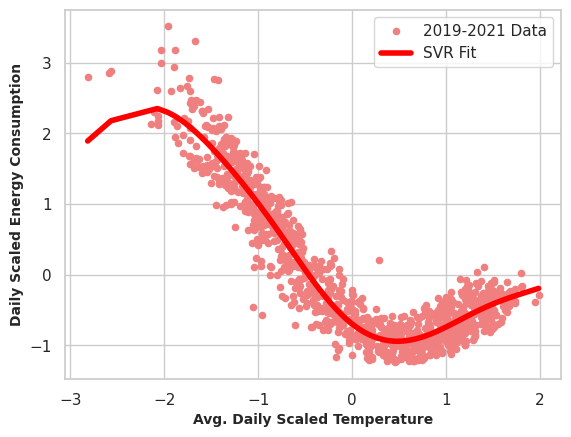

In [ ]:
# Make predicitions on the data
y_svr_d_bas_pred = svr_d_bas.predict(X_svr_d_bas_test)
X_svr_d_bas_plot = pd.DataFrame(X_svr_d_bas_test)
X_svr_d_bas_plot.columns=['x']
y_svr_d_bas_plot = pd.Series(y_svr_d_bas_pred, name='y')
svr_d_bas_plot = pd.concat([X_svr_d_bas_plot, y_svr_d_bas_plot], axis=1)
svr_d_bas_plot_plotsort = svr_d_bas_plot.sort_values(by='x')

# Check performance of prediction
svr_d_bas_r2_score = r2_score(Y_svr_d_bas_test, y_svr_d_bas_pred)
print("R^2 Error in Predicition: ")
print(svr_d_bas_r2_score)
svr_d_bas_mae = mean_absolute_error(Y_svr_d_bas_test, y_svr_d_bas_pred)
print("Mean Absolute Error:")
print(svr_d_bas_mae)

# Plot results
sns.set(style='whitegrid')
plt.scatter(svr_d_scaleddf['Temp'], svr_d_scaleddf['EnergyUse'], color='lightcoral', s=20, label='2019-2021 Data')
plt.plot(svr_d_bas_plot_plotsort['x'], svr_d_bas_plot_plotsort['y'], color="red", linewidth=4, label='SVR Fit')
plt.ylabel("Daily Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Daily Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
# Feature Scaling (Analysis Year)
svr_d_ana_x = sc_Xd.fit_transform(svr_d_ana_x_df)
svr_d_ana_y = sc_yd.fit_transform(svr_d_ana_y_df)
svr_d_ana_scaleddf = pd.DataFrame(np.hstack((svr_d_ana_x,svr_d_ana_y)), columns=['Temp','EnergyUse'])
svr_d_ana_scaleddf = svr_d_ana_scaleddf.astype(float)

svr_d_ana_scaledtemp = svr_d_ana_scaleddf['Temp']
svr_d_ana_scaledtemp = svr_d_ana_scaledtemp.astype(float)
svr_d_ana_scaledener = svr_d_ana_scaleddf['EnergyUse']
svr_d_ana_scaledener = svr_d_ana_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
X_svr_d_ana_train, X_svr_d_ana_test, Y_svr_d_ana_train, Y_svr_d_ana_test = train_test_split(svr_d_ana_x, svr_d_ana_y, test_size=0.3, random_state=101)

In [ ]:
# Generate Model and Perform Fit with Preffered Kernel
# Create SVR with Radial Basis Function (RBF) kernal
svr_d_ana = SVR(kernel='rbf')

# Train model with exisiting data
svr_d_ana.fit(X_svr_d_ana_train, Y_svr_d_ana_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

R^2 Error in Predicition: 
0.9083976626325929
Mean Absolute Error:
0.22124548393357543


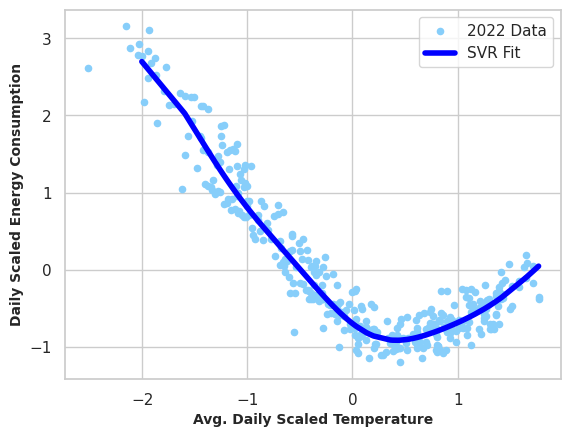

In [ ]:
# Make predicitions on the data
y_svr_d_ana_pred = svr_d_ana.predict(X_svr_d_ana_test)
X_svr_d_ana_plot = pd.DataFrame(X_svr_d_ana_test)
X_svr_d_ana_plot.columns=['x']
y_svr_d_ana_plot = pd.Series(y_svr_d_ana_pred, name='y')
svr_d_ana_plot = pd.concat([X_svr_d_ana_plot, y_svr_d_ana_plot], axis=1)
svr_d_ana_plot_plotsort = svr_d_ana_plot.sort_values(by='x')

# Check performance of prediction
svr_d_ana_r2_score = r2_score(Y_svr_d_ana_test, y_svr_d_ana_pred)
print("R^2 Error in Predicition: ")
print(svr_d_ana_r2_score)

svr_d_ana_mae = mean_absolute_error(Y_svr_d_ana_test, y_svr_d_ana_pred)
print("Mean Absolute Error:")
print(svr_d_ana_mae)

# Plot results
sns.set(style='whitegrid')
plt.scatter(svr_d_ana_scaleddf['Temp'], svr_d_ana_scaleddf['EnergyUse'], color='lightskyblue', s=20, label='2022 Data')
plt.plot(svr_d_ana_plot_plotsort['x'], svr_d_ana_plot_plotsort['y'], color="blue", linewidth=4, label='SVR Fit')
plt.ylabel("Daily Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Daily Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

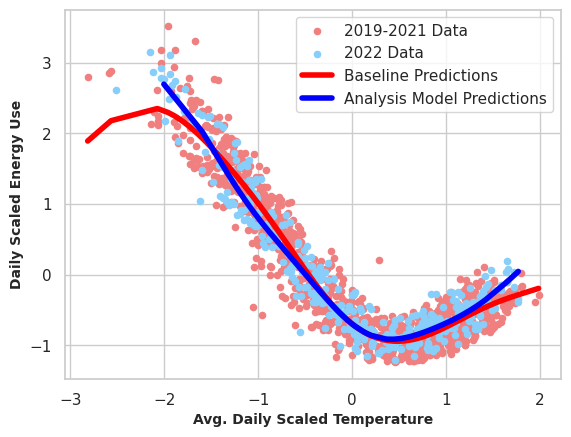

In [ ]:
# Combine baseline plot and analysis plot
plt.scatter(svr_d_scaleddf['Temp'], svr_d_scaleddf['EnergyUse'], label='2019-2021 Data', s=20, color='lightcoral')
plt.scatter(svr_d_ana_scaleddf['Temp'], svr_d_ana_scaleddf['EnergyUse'], label='2022 Data', s=20, color='lightskyblue')

plt.plot(svr_d_bas_plot_plotsort['x'], svr_d_bas_plot_plotsort['y'], label='Baseline Predictions', color='red', linewidth=4)
plt.plot(svr_d_ana_plot_plotsort['x'], svr_d_ana_plot_plotsort['y'], label='Analysis Model Predictions', color='blue', linewidth=4)
plt.xlabel('Avg. Daily Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Daily Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

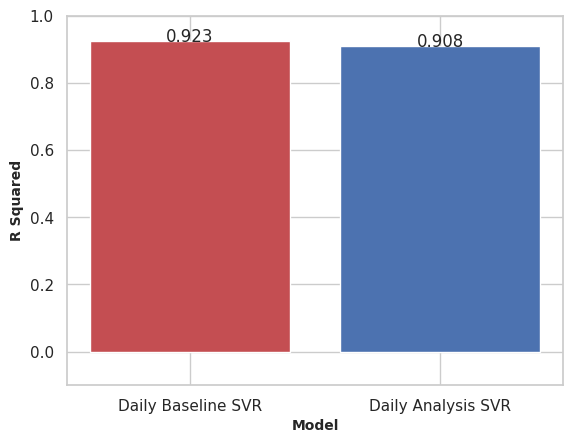

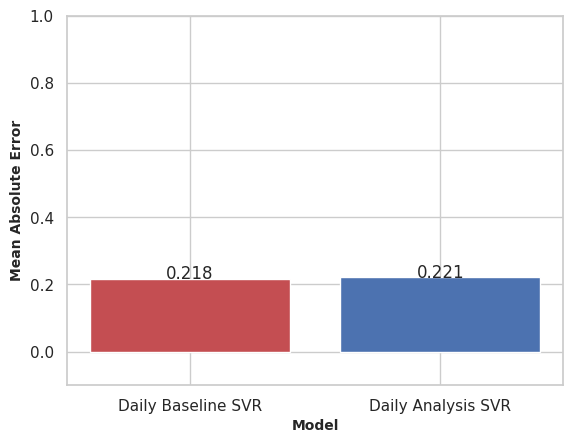

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between the BASELINE and ANALYSIS model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_d_svr_ca_x_r2 = ["Daily Baseline SVR", "Daily Analysis SVR"]
label_d_svr_ca_y_r2 = [0.923, 0.908]

plt.bar(bar_positions[0], svr_d_bas_r2_score, color ='r', edgecolor ='w', label ='Daily Baseline SVR R2')
plt.bar(bar_positions[1], svr_d_ana_r2_score, color ='b', edgecolor ='w', label ='Daily Analysis SVR R2')
plt.xticks(bar_positions, ['Daily Baseline SVR', 'Daily Analysis SVR'])

add_labels(label_d_svr_ca_x_r2, label_d_svr_ca_y_r2)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_d_svr_ca_x_mae = ["Daily Baseline SVR", "Daily Analysis SVR"]
label_d_svr_ca_y_mae = [0.218, 0.221]

plt.bar(bar_positions[0], svr_d_bas_mae, color ='r', edgecolor ='w', label ='Daily Baseline SVR MAE')
plt.bar(bar_positions[1], svr_d_ana_mae, color ='b', edgecolor ='w', label ='Daily Analysis SVR MAE')
plt.xticks(bar_positions, ['Daily Baseline SVR', 'Daily Analysis SVR'])

add_labels(label_d_svr_ca_x_mae, label_d_svr_ca_y_mae)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, SVR (Comparative Analysis, Hourly)

In [ ]:
# Divide Variables (2019-2021, exclude 2022)
filt_h_svr_bas_df = b1_hourly_df[b1_hourly_df['Year'] != 2022]
filt_h_svr_ana_df = b1_hourly_df[b1_hourly_df['Year'] == 2022]

svr_h_bas_x_df = np.array(filt_h_svr_bas_df['Temp'])
svr_h_bas_x_df = svr_h_bas_x_df.reshape(-1, 1)
svr_h_bas_y_df = np.array(filt_h_svr_bas_df['EnergyUse'])
svr_h_bas_y_df = svr_h_bas_y_df.reshape(-1, 1)

svr_h_ana_x_df = np.array(filt_h_svr_ana_df['Temp'])
svr_h_ana_x_df = svr_h_ana_x_df.reshape(-1, 1)
svr_h_ana_y_df = np.array(filt_h_svr_ana_df['EnergyUse'])
svr_h_ana_y_df = svr_h_ana_y_df.reshape(-1, 1)

In [ ]:
# Feature Scaling
svr_h_bas_x = sc_Xd.fit_transform(svr_h_bas_x_df)
svr_h_bas_y = sc_yd.fit_transform(svr_h_bas_y_df)
svr_h_scaleddf = pd.DataFrame(np.hstack((svr_h_bas_x,svr_h_bas_y)), columns=['Temp','EnergyUse'])
svr_h_scaleddf = svr_h_scaleddf.astype(float)

svr_h_scaledtemp = svr_h_scaleddf['Temp']
svr_h_scaledtemp = svr_h_scaledtemp.astype(float)
svr_h_scaledener = svr_h_scaleddf['EnergyUse']
svr_h_scaledener = svr_h_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
X_svr_h_bas_train, X_svr_h_bas_test, Y_svr_h_bas_train, Y_svr_h_bas_test = train_test_split(svr_h_bas_x, svr_h_bas_y, test_size=0.3, random_state=101)

In [ ]:
# Create SVR with Radial Basis Function (RBF) kernal
svr_h_bas = SVR(kernel='rbf')

# Train model with exisiting data
svr_h_bas.fit(X_svr_h_bas_train, Y_svr_h_bas_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

R^2 Error in Predicition: 
0.8046411606404703
Mean Absolute Error:
0.324238566962743


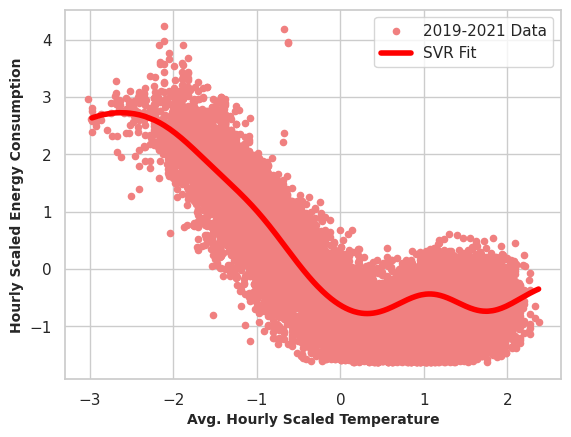

In [ ]:
# Make predicitions on the data
y_svr_h_bas_pred = svr_h_bas.predict(X_svr_h_bas_test)
X_svr_h_bas_plot = pd.DataFrame(X_svr_h_bas_test)
X_svr_h_bas_plot.columns=['x']
y_svr_h_bas_plot = pd.Series(y_svr_h_bas_pred, name='y')
svr_h_bas_plot = pd.concat([X_svr_h_bas_plot, y_svr_h_bas_plot], axis=1)
svr_h_bas_plot_plotsort = svr_h_bas_plot.sort_values(by='x')

# Check performance of prediction
svr_h_bas_r2_score = r2_score(Y_svr_h_bas_test, y_svr_h_bas_pred)
print("R^2 Error in Predicition: ")
print(svr_h_bas_r2_score)
svr_h_bas_mae = mean_absolute_error(Y_svr_h_bas_test, y_svr_h_bas_pred)
print("Mean Absolute Error:")
print(svr_h_bas_mae)

# Plot results
sns.set(style='whitegrid')
plt.scatter(svr_h_scaleddf['Temp'], svr_h_scaleddf['EnergyUse'], color='lightcoral', s=20, label='2019-2021 Data')
plt.plot(svr_h_bas_plot_plotsort['x'], svr_h_bas_plot_plotsort['y'], color="red", linewidth=4, label='SVR Fit')
plt.ylabel("Hourly Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Hourly Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
# Feature Scaling (Analysis Year)
svr_h_ana_x = sc_Xd.fit_transform(svr_h_ana_x_df)
svr_h_ana_y = sc_yd.fit_transform(svr_h_ana_y_df)
svr_h_ana_scaleddf = pd.DataFrame(np.hstack((svr_h_ana_x,svr_h_ana_y)), columns=['Temp','EnergyUse'])
svr_h_ana_scaleddf = svr_h_ana_scaleddf.astype(float)

svr_h_ana_scaledtemp = svr_h_ana_scaleddf['Temp']
svr_h_ana_scaledtemp = svr_h_ana_scaledtemp.astype(float)
svr_h_ana_scaledener = svr_h_ana_scaleddf['EnergyUse']
svr_h_ana_scaledener = svr_h_ana_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
X_svr_h_ana_train, X_svr_h_ana_test, Y_svr_h_ana_train, Y_svr_h_ana_test = train_test_split(svr_h_ana_x, svr_h_ana_y, test_size=0.3, random_state=101)

In [ ]:
# Generate Model and Perform Fit with Preffered Kernel
# Create SVR with Radial Basis Function (RBF) kernal
svr_h_ana = SVR(kernel='rbf')

# Train model with exisiting data
svr_h_ana.fit(X_svr_h_ana_train, Y_svr_h_ana_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

R^2 Error in Predicition: 
0.8429694721680012
Mean Absolute Error:
0.30405985773992017


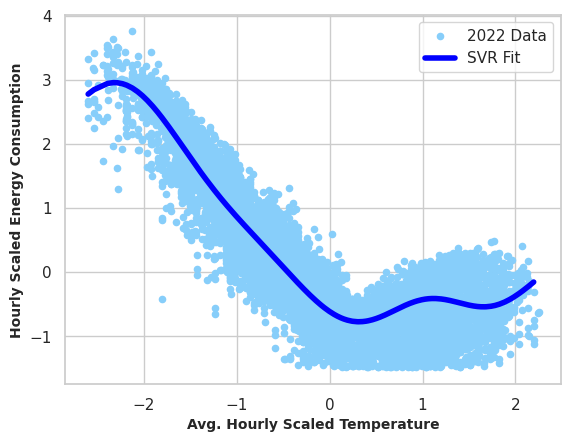

In [ ]:
# Make predicitions on the data
y_svr_h_ana_pred = svr_h_ana.predict(X_svr_h_ana_test)
X_svr_h_ana_plot = pd.DataFrame(X_svr_h_ana_test)
X_svr_h_ana_plot.columns=['x']
y_svr_h_ana_plot = pd.Series(y_svr_h_ana_pred, name='y')
svr_h_ana_plot = pd.concat([X_svr_h_ana_plot, y_svr_h_ana_plot], axis=1)
svr_h_ana_plot_plotsort = svr_h_ana_plot.sort_values(by='x')

# Check performance of prediction
svr_h_ana_r2_score = r2_score(Y_svr_h_ana_test, y_svr_h_ana_pred)
print("R^2 Error in Predicition: ")
print(svr_h_ana_r2_score)

svr_h_ana_mae = mean_absolute_error(Y_svr_h_ana_test, y_svr_h_ana_pred)
print("Mean Absolute Error:")
print(svr_h_ana_mae)

# Plot results
sns.set(style='whitegrid')
plt.scatter(svr_h_ana_scaleddf['Temp'], svr_h_ana_scaleddf['EnergyUse'], color='lightskyblue', s=20, label='2022 Data')
plt.plot(svr_h_ana_plot_plotsort['x'], svr_h_ana_plot_plotsort['y'], color="blue", linewidth=4, label='SVR Fit')
plt.ylabel("Hourly Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Hourly Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

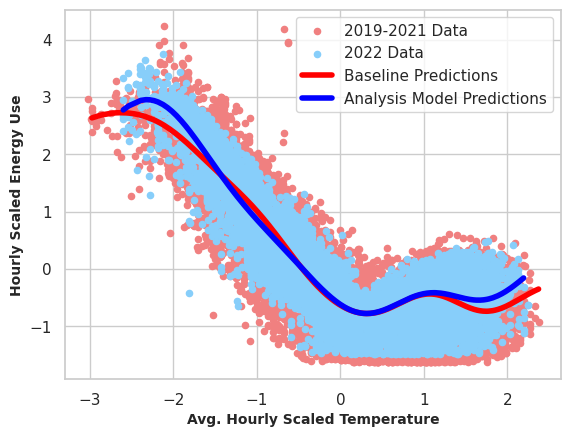

In [ ]:
# Combine baseline plot and analysis plot
plt.scatter(svr_h_scaleddf['Temp'], svr_h_scaleddf['EnergyUse'], label='2019-2021 Data', s=20, color='lightcoral')
plt.scatter(svr_h_ana_scaleddf['Temp'], svr_h_ana_scaleddf['EnergyUse'], label='2022 Data', s=20, color='lightskyblue')

plt.plot(svr_h_bas_plot_plotsort['x'], svr_h_bas_plot_plotsort['y'], label='Baseline Predictions', color='red', linewidth=4)
plt.plot(svr_h_ana_plot_plotsort['x'], svr_h_ana_plot_plotsort['y'], label='Analysis Model Predictions', color='blue', linewidth=4)
plt.xlabel('Avg. Hourly Scaled Temperature', fontweight ='bold', fontsize = 10)
plt.ylabel('Hourly Scaled Energy Use', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

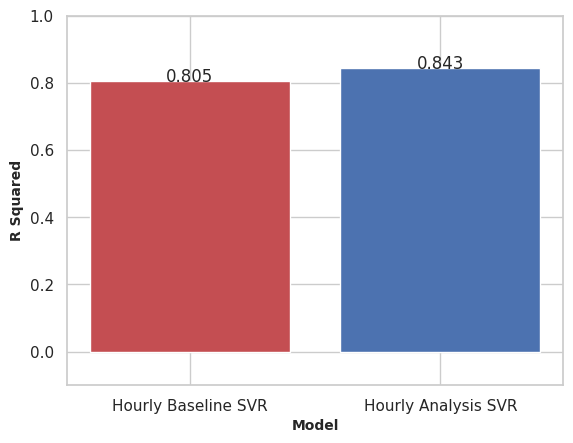

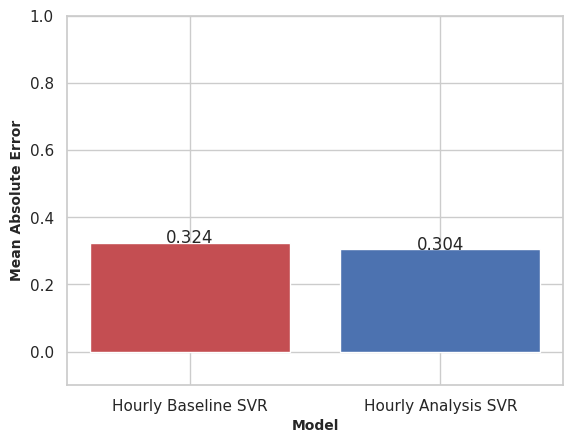

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between the BASELINE and ANALYSIS model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_h_svr_ca_x_r2 = ["Hourly Baseline SVR", "Hourly Analysis SVR"]
label_h_svr_ca_y_r2 = [0.805, 0.843]

plt.bar(bar_positions[0], svr_h_bas_r2_score, color ='r', edgecolor ='w', label ='Hourly Baseline SVR R2')
plt.bar(bar_positions[1], svr_h_ana_r2_score, color ='b', edgecolor ='w', label ='Hourly Analysis SVR R2')
plt.xticks(bar_positions, ['Hourly Baseline SVR', 'Hourly Analysis SVR'])

add_labels(label_h_svr_ca_x_r2, label_h_svr_ca_y_r2)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
sns.set(style='whitegrid')
plt.ylim(-0.1, 1)
bar_positions = np.arange(2)

label_h_svr_ca_x_mae = ["Hourly Baseline SVR", "Hourly Analysis SVR"]
label_h_svr_ca_y_mae = [0.324, 0.304]

plt.bar(bar_positions[0], svr_h_bas_mae, color ='r', edgecolor ='w', label ='Hourly Baseline SVR MAE')
plt.bar(bar_positions[1], svr_h_ana_mae, color ='b', edgecolor ='w', label ='Hourly Analysis SVR MAE')
plt.xticks(bar_positions, ['Hourly Baseline SVR', 'Hourly Analysis SVR'])

add_labels(label_h_svr_ca_x_mae, label_h_svr_ca_y_mae)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, Comparative Analysis, Performance Benchmarking

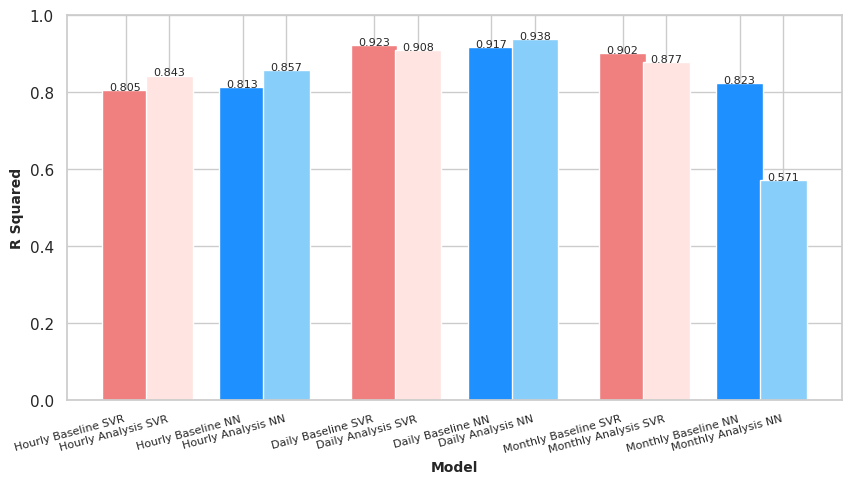

In [ ]:
# Compare ALL R2 Against Eachother for Comparative Analysis
# Function to place labels at the center of each bar
def add_labels(l, x, y):
    for i in range(len(l)):
        plt.text(l[i], y[i], y[i], ha='center', fontsize=8)  # Aligning text at center

# sns.set(style='whitegrid')

fig = plt.figure(figsize=(10, 5))
plt.ylim(0, 1)
bar_positions = [0,0.75, 2,2.75, 4.25,5, 6.25,7, 8.5,9.25, 10.5,11.25]

label_ca_all_x_r2 = [label_h_svr_ca_x_r2[0], label_h_svr_ca_x_r2[1], label_h_ca_x_r2[0], label_h_ca_x_r2[1], label_d_svr_ca_x_r2[0], label_d_svr_ca_x_r2[1], label_d_ca_x_r2[0], label_d_ca_x_r2[1],
                     label_m_svr_ca_x_r2[0], label_m_svr_ca_x_r2[1], label_m_ca_x_r2[0], label_m_ca_x_r2[1]]

label_ca_all_y_r2 = [label_h_svr_ca_y_r2[0], label_h_svr_ca_y_r2[1], label_h_ca_y_r2[0], label_h_ca_y_r2[1], label_d_svr_ca_y_r2[0], label_d_svr_ca_y_r2[1], label_d_ca_y_r2[0], label_d_ca_y_r2[1],
                     label_m_svr_ca_y_r2[0], label_m_svr_ca_y_r2[1], label_m_ca_y_r2[0], label_m_ca_y_r2[1]]

plt.bar(bar_positions[0], svr_h_bas_r2_score, color ='lightcoral', edgecolor ='w', label ='Hourly Baseline SVR R2')
plt.bar(bar_positions[1], svr_h_ana_r2_score, color ='mistyrose', edgecolor ='w', label ='Hourly Analysis SVR R2')
plt.bar(bar_positions[2], r2_result_h_bas, color ='dodgerblue', edgecolor ='w', label ='Hourly Baseline NN R2')
plt.bar(bar_positions[3], r2_result_h_ana, color ='lightskyblue', edgecolor ='w', label ='Hourly Analysis NN R2')
plt.bar(bar_positions[4], svr_d_bas_r2_score, color ='lightcoral', edgecolor ='w', label ='Daily Baseline SVR R2')
plt.bar(bar_positions[5], svr_d_ana_r2_score, color ='mistyrose', edgecolor ='w', label ='Daily Analysis SVR R2')
plt.bar(bar_positions[6], r2_result2, color ='dodgerblue', edgecolor ='w', label ='Daily Baseline NN R2')
plt.bar(bar_positions[7], r2_result_an, color ='lightskyblue', edgecolor ='w', label ='Daily Analysis NN R2')
plt.bar(bar_positions[8], svr_m_bas_r2_score, color ='lightcoral', edgecolor ='w', label ='Monthly Baseline SVR R2')
plt.bar(bar_positions[9], svr_m_ana_r2_score, color ='mistyrose', edgecolor ='w', label ='Monthly Analysis SVR R2')
plt.bar(bar_positions[10], r2_result_m_ca_bas, color ='dodgerblue', edgecolor ='w', label ='Monthly Baseline NN R2')
plt.bar(bar_positions[11], r2_result_m_ca_ana, color ='lightskyblue', edgecolor ='w', label ='Monthly Analysis NN R2')
plt.xticks(bar_positions, ['Hourly Baseline SVR', 'Hourly Analysis SVR', 'Hourly Baseline NN','Hourly Analysis NN',
                           'Daily Baseline SVR', 'Daily Analysis SVR', 'Daily Baseline NN', 'Daily Analysis NN',
                           'Monthly Baseline SVR', 'Monthly Analysis SVR', 'Monthly Baseline NN', 'Monthly Analysis NN'], fontsize = 8, rotation=15, ha='right')

add_labels(bar_positions, label_ca_all_x_r2, label_ca_all_y_r2)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

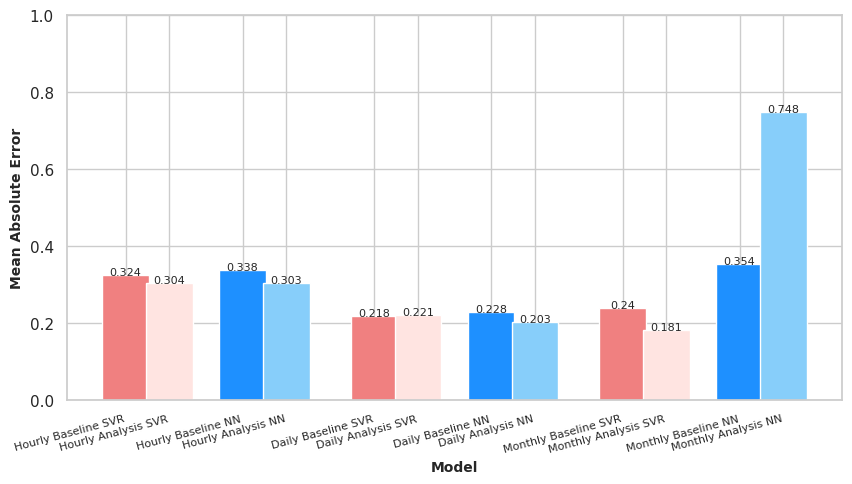

In [ ]:
# Compare ALL MAE Against Eachother for Comparative Analysis
# Function to place labels at the center of each bar
def add_labels(l, x, y):
    for i in range(len(l)):
        plt.text(l[i], y[i], y[i], ha='center', fontsize=8)  # Aligning text at center

# sns.set(style='whitegrid')

fig = plt.figure(figsize=(10, 5))
plt.ylim(0, 1)
bar_positions = [0,0.75, 2,2.75, 4.25,5, 6.25,7, 8.5,9.25, 10.5,11.25]

label_ca_all_x_mae = [label_h_svr_ca_x_mae[0], label_h_svr_ca_x_mae[1], label_h_ca_x_mae[0], label_h_ca_x_mae[1],
                      label_d_svr_ca_x_mae[0], label_d_svr_ca_x_mae[1], label_d_ca_x_mae[0], label_d_ca_x_mae[1],
                     label_m_svr_ca_x_mae[0], label_m_svr_ca_x_mae[1], label_m_ca_x_mae[0], label_m_ca_x_mae[1]]

label_ca_all_y_mae = [label_h_svr_ca_y_mae[0], label_h_svr_ca_y_mae[1], label_h_ca_y_mae[0], label_h_ca_y_mae[1],
                      label_d_svr_ca_y_mae[0], label_d_svr_ca_y_mae[1], label_d_ca_y_mae[0], label_d_ca_y_mae[1],
                     label_m_svr_ca_y_mae[0], label_m_svr_ca_y_mae[1], label_m_ca_y_mae[0], label_m_ca_y_mae[1]]

plt.bar(bar_positions[0], svr_h_bas_mae, color ='lightcoral', edgecolor ='w', label ='Hourly Baseline SVR MAE')
plt.bar(bar_positions[1], svr_h_ana_mae, color ='mistyrose', edgecolor ='w', label ='Hourly Analysis SVR MAE')
plt.bar(bar_positions[2], mae_h_bas_value, color ='dodgerblue', edgecolor ='w', label ='Hourly Baseline NN MAE')
plt.bar(bar_positions[3], mae_h_ana_value, color ='lightskyblue', edgecolor ='w', label ='Hourly Analysis NN MAE')

plt.bar(bar_positions[4], svr_d_bas_mae, color ='lightcoral', edgecolor ='w', label ='Daily Baseline SVR MAE')
plt.bar(bar_positions[5], svr_d_ana_mae, color ='mistyrose', edgecolor ='w', label ='Daily Analysis SVR MAE')
plt.bar(bar_positions[6], mae_value2, color ='dodgerblue', edgecolor ='w', label ='Daily Baseline NN MAE')
plt.bar(bar_positions[7], mae_value_an, color ='lightskyblue', edgecolor ='w', label ='Daily Analysis NN MAE')

plt.bar(bar_positions[8], svr_m_bas_mae, color ='lightcoral', edgecolor ='w', label ='Monthly Baseline SVR MAE')
plt.bar(bar_positions[9], svr_m_ana_mae, color ='mistyrose', edgecolor ='w', label ='Monthly Analysis SVR MAE')
plt.bar(bar_positions[10], mae_m_ca_bas_value, color ='dodgerblue', edgecolor ='w', label ='Monthly Baseline NN MAE')
plt.bar(bar_positions[11], mae_value_m_ca_ana, color ='lightskyblue', edgecolor ='w', label ='Monthly Analysis NN MAE')
plt.xticks(bar_positions, ['Hourly Baseline SVR', 'Hourly Analysis SVR', 'Hourly Baseline NN','Hourly Analysis NN',
                           'Daily Baseline SVR', 'Daily Analysis SVR', 'Daily Baseline NN', 'Daily Analysis NN',
                           'Monthly Baseline SVR', 'Monthly Analysis SVR', 'Monthly Baseline NN', 'Monthly Analysis NN'], fontsize = 8, rotation=15, ha='right')

add_labels(bar_positions, label_ca_all_x_mae, label_ca_all_y_mae)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()